# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:** 

 1. Найти интересные закономерности и зависимости, которые существуют на рынке.
 2. Выяснить, какие факторы больше всего влияют на стоимость квартиры.


**Ход исследования:**

 1. Обзор данных.
 2. Предобработка данных.
 3. Расчет и добавление в таблицу новых столбцов.
 4. Исследовательский анализ данных.
 5. Общий вывод.
 

 **Описание данных**:


- `airports_nearest`— расстояние до ближайшего аэропорта в метрах (м).
- `balcony` — число балконов, тип данных.
- `ceiling_height` — высота потолков (м).
- `cityCenters_nearest` — расстояние до центра города (м).
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия).
- `first_day_exposition` — дата публикации.
- `floor` — этаж.
- `floors_total` — всего этажей в доме.
- `is_apartment` — апартаменты (булев тип).
- `kitchen_area` — площадь кухни в квадратных метрах (м²).
- `last_price` — цена на момент снятия с публикации.
- `living_area` — жилая площадь в квадратных метрах (м²).
- `locality_name` — название населённого пункта.
- `open_plan` — свободная планировка (булев тип).
- `parks_around3000` — число парков в радиусе 3 км.
- `parks_nearest` — расстояние до ближайшего парка (м).
- `ponds_around3000` — число водоёмов в радиусе 3 км.
- `ponds_nearest` — расстояние до ближайшего водоёма (м).
- `rooms` — число комнат.
- `studio` — квартира-студия (булев тип).
- `total_area` — общая площадь квартиры в квадратных метрах (м²).
- `total_images` — число фотографий квартиры в объявлении.

## Обзор данных.

 ### 1. Откроем файл и изучим общую информацию. ###

In [1]:
#Импортируем библиотеку pandas
#Импортируем библиотеку matplotlib
#Импортируем библиотеку numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#Прочитаем файл и сохраним его в переменную data

In [5]:
try:
    data_full = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
except:
    data_full = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [1]:
#Получим общую информацию о датафрейме, выведем первые 10 строк датафрейма

In [7]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
data_full.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [9]:
data = data_full

**Вывод:**

 - В таблице 22 столбца и 23699 строк. Мы видим что во многих столбцах пропущенны значения; в столбцах `cityCenters_nearest`, `parks_around3000`, `ponds_around3000`  нарушено правило змеиного регистра названий столбцов. 
 - В некоторых столбцах неккоректный или нелогичный тип данных. Например, в столбце `is_apartment ` согласно документации тип данных `bool`, а общей информации о таблице мы видим, что тип данных `object`; в столбце `first_day_exposition`логичный тип данных `datetime`, а мы видим что тип данных `object`; В столбце `floors_total`мы видим тип данных `float64`, а правильный тип данных `int64`, так как количество этажей - это целое число; тоже самое касается и столбцов: `balcony`, `parks_around3000`, `ponds_around3000`.
 


### Построим общую гистограмму для всех числовых столбцов таблицы. ###

In [10]:
#Методом hist() построим общую гистограмму для всех числовых столбцов таблицы и получим общую информацию о распределении.

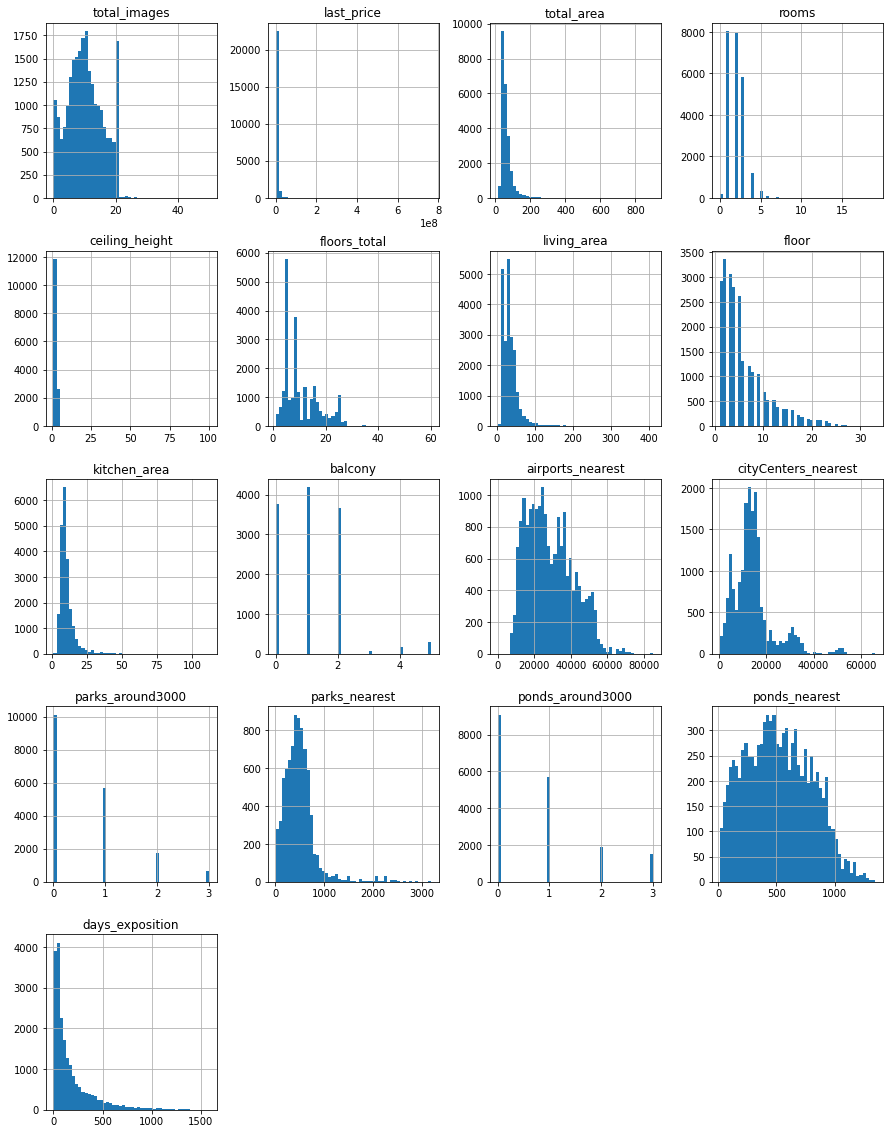

In [11]:
data.hist(bins=50, figsize=(15, 20));

**Вывод:**

В целом по гистограммам мы видим нормальное распределение значений в столбцах. По столбцам `last_price` и `ceiling_height` сложно что-либо сказать, так как все значения собрались в одном столбце и для большей наглядности необходимо увеличить число корзин и сократить диапазон, также странно, что в столбце `last_price` есть значения около нуля. Столбец `days_exposition` пока не вызывает вопросов, гистограмма похожа на распределение Пуассона - чем больше времени от публикации до снятия, тем меньше таких объявлений (иными словами, чем быстрее продается квартира, тем таких объявлений больше). В ходе дальнейшего исследования вернемся к гистограммам и изучим их более детально.


## Предобработка данных

### Стиль заголовков ###

In [12]:
#Выведем на экран названия столбцов 

In [13]:
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [14]:
#Приведем названия столбцов к хорошему стилю

In [15]:
data = data.rename(columns={'cityCenters_nearest':'city_сenters_nearest', 
                            'parks_around3000':'parks_around_3000', 
                            'ponds_around3000':'ponds_around_3000'})

In [16]:
#Проверим произведенные изменения:

In [17]:
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


 **Вывод:** Названия столбцов исправлены в соответствии с хорошим стилем.   

### Пропуски значений ###

In [18]:
#Выведем количество пропущенных значений для каждого столбца

In [19]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Вывод:** Обнаруженые пропуски в 14 столбцах. В двух столбцах `floors_total` и  `locality_name` количество пропущенных значений менее 0.3% и 0.2%, на дальнейший анализ они не повлияют, поэтому их можно удалить. 
В остальных столбцах процент пропуска более 5%:
 - ceiling_height
 - living_area
 - is_apartment
 - kitchen_area
 - balcony
 - airports_nearest
 - city_сenters_nearest
 - parks_around_3000
 - parks_nearest
 - ponds_around_3000
 - ponds_nearest 
 - days_exposition 

In [20]:
#Удалим пропуски в столбцах floors_total и locality_name, сбросим индексы строк и проверим выполненные изменения.

In [21]:
data = data.dropna(subset=['floors_total', 'locality_name']).reset_index(drop=True)

In [22]:
data['floors_total'].isna().sum()

0

In [23]:
data['locality_name'].isna().sum()

0

In [24]:
#В столблце floors_total заменим тип данных на int, поскольку количество этажей целое число

In [25]:
data['floors_total'] = data['floors_total'].astype('int')

In [26]:
#Посмотрим на редкие и выбивающиеся значения столбца `floors_total`

In [27]:
data['floors_total'].value_counts()

5     5775
9     3758
16    1375
12    1361
4     1193
10    1174
25    1075
6      910
17     833
3      667
7      589
14     553
18     505
24     462
8      388
2      381
15     365
23     349
19     339
22     286
20     271
13     229
11     202
27     164
21     158
26     124
1       25
35      24
28      21
36       3
34       1
60       1
52       1
29       1
33       1
37       1
Name: floors_total, dtype: int64

In [28]:
#Значения выше 37 этажей кажутся аномалиями, избавимся от них:

In [29]:
data = data.loc[data['floors_total'] < 37].reset_index(drop=True)

#### Пропуски в столбце ceiling_height ####


In [30]:
#Посмотрим на количество пропусков в столбце ceiling_height

In [31]:
data['ceiling_height'].isna().sum()

9084

In [32]:
#В столбце `ceiling_height` обнаружено 9084 пропуска, что составляет 38% от всех данных. Изучим столбец подробнее.

In [33]:
data[data['ceiling_height'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


Зависимость наличия пропусков от других столбцов и данных датасета не наблюдается. Скорее всего пользователи при публикации объявления пропускали этот пункт по каким-либо собственным причинам.

In [34]:
#посмотрим на уникальные значения столбца ceiling_height, отсортировав их в порядке убывания

In [35]:
data['ceiling_height'].sort_values(ascending=False).unique()

array([100.  ,  32.  ,  27.5 ,  27.  ,  26.  ,  25.  ,  24.  ,  22.6 ,
        20.  ,  14.  ,  10.3 ,   8.3 ,   8.  ,   6.  ,   5.8 ,   5.6 ,
         5.5 ,   5.3 ,   5.2 ,   5.  ,   4.9 ,   4.8 ,   4.7 ,   4.65,
         4.5 ,   4.45,   4.4 ,   4.37,   4.3 ,   4.25,   4.2 ,   4.19,
         4.15,   4.14,   4.1 ,   4.06,   4.  ,   3.98,   3.95,   3.93,
         3.9 ,   3.88,   3.87,   3.86,   3.85,   3.84,   3.83,   3.82,
         3.8 ,   3.78,   3.76,   3.75,   3.7 ,   3.69,   3.68,   3.67,
         3.66,   3.65,   3.63,   3.62,   3.6 ,   3.59,   3.58,   3.57,
         3.56,   3.55,   3.54,   3.53,   3.52,   3.51,   3.5 ,   3.49,
         3.48,   3.47,   3.46,   3.45,   3.44,   3.43,   3.42,   3.4 ,
         3.39,   3.38,   3.37,   3.36,   3.35,   3.34,   3.33,   3.32,
         3.31,   3.3 ,   3.29,   3.28,   3.27,   3.26,   3.25,   3.24,
         3.23,   3.22,   3.21,   3.2 ,   3.18,   3.17,   3.16,   3.15,
         3.14,   3.13,   3.12,   3.11,   3.1 ,   3.09,   3.08,   3.07,
      

Мы видим аномальные значения высоты потолков для квартир, начиная от 20 метров. Скорее всего, это ошибки, и пользователи забыли поставить разделительную запятую. 

In [36]:
#Исправим ошибочные значения столбца ceiling_height и проверим произведенные изменения.

In [37]:
for elem in data.loc[data['ceiling_height'] >= 20, 'ceiling_height'].sort_values().unique():
    data.loc[data['ceiling_height'] == elem, 'ceiling_height'] = elem/10
data['ceiling_height'].sort_values(ascending=False).unique()

array([14.  , 10.3 , 10.  ,  8.3 ,  8.  ,  6.  ,  5.8 ,  5.6 ,  5.5 ,
        5.3 ,  5.2 ,  5.  ,  4.9 ,  4.8 ,  4.7 ,  4.65,  4.5 ,  4.45,
        4.4 ,  4.37,  4.3 ,  4.25,  4.2 ,  4.19,  4.15,  4.14,  4.1 ,
        4.06,  4.  ,  3.98,  3.95,  3.93,  3.9 ,  3.88,  3.87,  3.86,
        3.85,  3.84,  3.83,  3.82,  3.8 ,  3.78,  3.76,  3.75,  3.7 ,
        3.69,  3.68,  3.67,  3.66,  3.65,  3.63,  3.62,  3.6 ,  3.59,
        3.58,  3.57,  3.56,  3.55,  3.54,  3.53,  3.52,  3.51,  3.5 ,
        3.49,  3.48,  3.47,  3.46,  3.45,  3.44,  3.43,  3.42,  3.4 ,
        3.39,  3.38,  3.37,  3.36,  3.35,  3.34,  3.33,  3.32,  3.31,
        3.3 ,  3.29,  3.28,  3.27,  3.26,  3.25,  3.24,  3.23,  3.22,
        3.21,  3.2 ,  3.18,  3.17,  3.16,  3.15,  3.14,  3.13,  3.12,
        3.11,  3.1 ,  3.09,  3.08,  3.07,  3.06,  3.05,  3.04,  3.03,
        3.02,  3.01,  3.  ,  2.99,  2.98,  2.97,  2.96,  2.95,  2.94,
        2.93,  2.92,  2.91,  2.9 ,  2.89,  2.88,  2.87,  2.86,  2.85,
        2.84,  2.83,

In [38]:
#Посчитаем количество объявлений для квартир с высотой потолков выше 7 метров

In [39]:
len(data.loc[data['ceiling_height'] >= 7])

7

In [40]:
#Посчитаем количество объявлений для квартир с высотой потолков выше менее 2 метров

In [41]:
len(data.loc[data['ceiling_height'] <= 2])

14

In [42]:
#Жилые помещения с высотой потолков 2 метра и менее выглядят очень странно, избавимся от них

In [43]:
data = data.loc[(data['ceiling_height'] > 2.0)&(data['ceiling_height'] < 7.0)|(data['ceiling_height'].isna())]

In [44]:
#Посмотрим на характерные значения столбца ceiling_height

In [45]:
data['ceiling_height'].describe()

count    14457.000000
mean         2.726934
std          0.277891
min          2.200000
25%          2.510000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

In [46]:
#Проведем заполнение пропусков в столбце с группировкой по километрам до центра, 
#так как высота потолков в Питерском центре медианно выше, чем в пригородах, и проверим изменения 

In [47]:
for elem in data['city_сenters_nearest'].unique():
    data.loc[(data['city_сenters_nearest'] == elem)&(data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[data['city_сenters_nearest'] == elem,  'ceiling_height'].median()     


In [48]:
data['ceiling_height'].isna().sum()

4708

In [49]:
data.shape

(23541, 22)

Посколько медиана столбца составляет 2.65, а среднее столбца 2.72 и медиана не сильно отличается от среднего, такой параметр, как высота потолков предположительно не влияет на стоимость квартиры или влияет незначительно, поэтому произведем заполнение оставшихся пропусков столбца `ceiling_height` медианным значением.

In [50]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

In [51]:
data['ceiling_height'].isna().sum()

0

In [52]:
data.shape

(23541, 22)

**Вывод:**
    
Причина возникновения пропусков в столбце `ceiling_height` - скорее всего пользователи, публикуя объявление не указывали данные, либо технические причины при сборе данных или импорте датасета. Параметр высота потолков на стоимость квартиры влияет незначительно. Мы исправили ошибочные значения столбца, частично пропуски заполнили с группировкой по километрам до центра, а оставшиеся пропуски также заполнили медианным значением.   

#### Пропуски в столбце living_area ####

В столбце `living_area` обнаружено 1865 пропусков, что составляет около 8% от всех данных. Вероятно, пропуски случайные и логичнее всего заполнить пропуски медианным значением в зависимости от количества комнат.

In [53]:
#Заполним пропуски медианным значением в зависимости от количества комнат.

In [54]:
for elem in data['rooms'].unique():
    data.loc[(data['rooms'] == elem)&(data['living_area'].isna()), 'living_area'] =\
    data.loc[data['rooms'] == elem, 'living_area'].median()
display(data['living_area'].isna().sum())    

0

#### Пропуски в столбце is_apartment ####

В столбце `is_apartment` 20805 пропусков. Тип данных `object`, хотя согласно документации должен быть булев тип. Логично предположить, что пропуски обозначают, что продаваемое жилье не является аппартаментами, поэтому заменим все пропущенные значения на False

In [55]:
#Приведем значения к типу данных `bool` и заменим пропущенные значения на False

In [56]:
data['is_apartment'] = data['is_apartment'].fillna('False').astype('bool')
print(data['is_apartment'].isna().sum())
print(data['is_apartment'].unique())

0
[ True False]


#### Пропуски в столбце kitchen_area ####

В столбце `kitchen_area` 2278 пропусков. Логично заполнить пропуски в  этом столбце медианным значением с группировкой по числу комнат столбца `rooms`. Перед заполнением важно изучить столбец `rooms` и исправить ошибочные значения, если таковые встречаются.


In [57]:
#посмотрим на уникальные значения столбца rooms и количество их повторений.

In [58]:
data['rooms'].value_counts()

1     7992
2     7890
3     5774
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [59]:
#Мы видим 194 значения с 0 комнат, проверим, сколько из них являются апартаментами и сколько из них являются студиями

In [60]:
len(data.loc[(data['rooms'] == 0)&(data['is_apartment'] == True)])

188

In [61]:
len(data.loc[(data['studio'] == True)&(data['rooms'] == 0)])

135

In [62]:
#Заполним все нулевые значения столбце rooms единичками, так как вполне вероятно, 
#что при размещении объявлений о продаже аппартаментов или студий пользователи не заполняли количество кухонь, 
#к тому же вполне часто бывает что однокомнатные студии бывают аппартаментами, таких студий у нас 131

In [63]:
len(data.loc[(data['is_apartment'] == True)&(data['studio'] == True)])

131

In [64]:
data.loc[data['rooms'] == 0, 'rooms'] = 1

In [65]:
#проверим произведенные изменения

In [66]:
len(data.loc[data['rooms'] == 0])

0

In [67]:
#Квартиры с количеством комнат более 7 можно отнести к редким и аномальным значениям, удалим эти строки и проверим изменения

In [68]:
data = data.loc[data['rooms'] < 8]

In [69]:
data['rooms'].unique()

array([3, 1, 2, 4, 5, 6, 7])

In [70]:
#Заполним пропуски в столбце kitchen_area медианным значением в зависимости от количества комнат.

In [71]:
#data['kitchen_area'] = data.groupby('rooms')['kitchen_area'].transform(lambda x: x.fillna(x.median()))
for elem in data['rooms'].unique():
    data.loc[(data['rooms'] == elem)&(data['kitchen_area'].isna()), 'kitchen_area']=\
    data.loc[data['rooms'] == elem, 'kitchen_area'].median()

In [72]:
data['kitchen_area'].isna().sum()

0

In [73]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11440
locality_name               0
airports_nearest         5514
city_сenters_nearest     5491
parks_around_3000        5490
parks_nearest           15515
ponds_around_3000        5490
ponds_nearest           14499
days_exposition          3160
dtype: int64

#### Пропуски в столбце balcony ####

Пропуски в столбце `balcony` могут означать отсутствие балконов, поэтому заменими пустые значения в столбце на 0, а также приведем их к типу данных `int`, так как число балконов целое число.

In [74]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['balcony'].isna().sum()

0

In [75]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5514
city_сenters_nearest     5491
parks_around_3000        5490
parks_nearest           15515
ponds_around_3000        5490
ponds_nearest           14499
days_exposition          3160
dtype: int64

#### Пропуски в столбце city_сenters_nearest ####

In [76]:
print(data['city_сenters_nearest'].isna().sum())

5491


В столбце `city_сenters_nearest` 5500 пропусков, что составляет 23% от всего датасета. 
Данный параметр играет важную роль в формировании стоимости жилья. Изучим его подробнее, посмотрим на значения других столбцов

In [77]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,3.00,14,45.00,9,True,False,False,9.50,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,True,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.60,26,10.60,6,True,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24,30.50,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,True,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Предположим, что пропущены значения для поселков и деревень, проверим эту гипотезу и
отфильтруем значения по пропускам в столбце `city_сenters_nearest` и посмотрим, 
есть ли пропущенные значения для Санкт-Петербурга, а заодно посмотрим на эти строки.

In [78]:
data.loc[(data['city_сenters_nearest'].isna())&(data['locality_name'] == 'Санкт-Петербург')]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
81,9,10949000.0,68.00,2018-12-27T00:00:00,1,2.65,10,17.60,6,True,False,False,9.00,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590,20,4200000.0,38.30,2019-04-16T00:00:00,1,2.60,16,19.80,10,True,False,False,10.10,2,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,11,9899000.0,101.00,2018-12-12T00:00:00,3,3.00,5,62.00,3,True,False,False,15.00,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
738,7,37000000.0,161.00,2016-05-22T00:00:00,3,2.65,9,84.00,8,True,False,False,9.50,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,402.0
791,19,7100000.0,59.60,2019-02-13T00:00:00,2,3.40,5,36.60,2,True,False,False,12.50,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1331,12,18500000.0,66.00,2017-06-08T00:00:00,1,3.00,7,25.00,7,True,False,False,35.00,1,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,130.0
1866,13,3100000.0,32.00,2019-03-15T00:00:00,1,2.65,4,19.00,2,False,False,False,5.00,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1889,12,9500000.0,130.00,2019-03-27T00:00:00,5,2.65,5,90.00,2,True,False,False,15.00,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,15.0
2355,17,4300000.0,32.60,2019-04-28T00:00:00,1,2.65,25,14.30,17,True,False,False,8.10,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2695,14,5650000.0,51.00,2019-02-26T00:00:00,2,3.20,9,31.00,5,True,False,False,10.00,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
print(data['city_сenters_nearest'].isna().sum())

5491


Пропущеные значения в 60 объявлениях для Санкт-Петербурга, посмотрим, насколько критично 
такое количество пропущенных значений может повлиять на результат и посмотрим сколько всего объявлений для Санкт-Петербурга

In [80]:
print(len(data.loc[(data['city_сenters_nearest'].isna())&(data['locality_name'] == 'Санкт-Петербург')])\
      /len(data.loc[data['locality_name'] == 'Санкт-Петербург']))

0.003843689942344651


Доля пропущенных значений столбца `city_сenters_nearest` для Санкт-Петербурга составляет 0.3% от общего количества объявлений для Санкт-Петербурга, на дальнейший анализ это не повлияет. Гипотеза подтвердилась, пропуски для других населенных пунктов(поселки, деревни, совхозы) составляют 98.9%. Заполним пропущенные значения столбца с группировкой по населенному пункту `locality_name`, а оставшиеся пропуски оставим как есть. Прежде, чем заполнять пропуски в `city_сenters_nearest`, проверим столбец `locality_name` на наличие неявных дубликатов и избавимся от них, если таковые присутствуют в датасете, для того, чтобы получить более чистые данные.

In [81]:
#Посмотрим на отсортированные уникальные значения столбца locality_name:

In [82]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [83]:
#Посчитаем количество уникальных значений столбца locality_name

In [84]:
len(sorted(data['locality_name'].unique()))

364

In [85]:
#Напишем функцию, которая удалит название типа населенного пункта, а именно, слово ДО заглавной буквы

In [86]:
def cut_name(name):
    try:
        for i in range(len(name)):
            if name[i].isupper() == True:
                return name[i:len(name)]
    except:
        pass

In [87]:
data['locality_name'] = data['locality_name'].apply(cut_name)

In [88]:
#проверим произведенные изменения

In [89]:
sorted(data['locality_name'].unique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',

In [90]:
#посчитаем оставшиеся уникальные значения столбца

In [91]:
len(sorted(data['locality_name'].unique()))

305

In [92]:
#Мы удалили 59 неявных дубликатов в столбце locality_name, теперь заполним пропуски в столбце city_сenters_nearest
#с группировкой по населенному пункту locality_name. 

In [93]:
for elem in data['locality_name'].unique():
    data.loc[(data['locality_name'] == elem)&(data['city_сenters_nearest'].isna() == True), 'city_сenters_nearest'] =\
    data.loc[data['locality_name'] == elem, 'city_сenters_nearest'].median()

In [94]:
data['city_сenters_nearest'].isna().sum()

5422

In [95]:
#оставшиеся пропуски оставим, как есть, поскольку удаленность от центра может напрямую влиять на стоимость жилья

**Вывод:** Доля пропущенных значений в столбце `city_сenters_nearest` для Санкт-Петербурга составила 0.3% от всех объявлений для Санкт-Петербурга. Мы избавились от неявных дубликатов столбца `locality_name`, пропуски в столбце заполнили медианным значением с группировкой по населенному пункту, а оставшиеся пропуски оставили как есть.

#### Пропуски в столбцах airports_nearest, parks_around_3000,  ponds_around_3000 ####

Количество пропусков для столбцов `city_сenters_nearest`, `airports_nearest`, `parks_around_3000`, `ponds_around_3000`  примерно одинаковое и составляет около 5500, пропуски в одних и тех же строках, проверим это

In [96]:
len(data.loc[(data['airports_nearest'].isna())&(data['parks_around_3000'].isna())&(data['ponds_around_3000'].isna())])

5490

In [97]:
#Посчитаем количество пропусков в данных столбцах для Санкт-Петербурга 

In [98]:
len(data.loc[(data['airports_nearest'].isna())&(data['parks_around_3000'].isna())&(data['ponds_around_3000'].isna())\
         &(data['locality_name'] == 'Санкт-Петербург')])

60

**Вывод:** Доля пропущенных значений в столбцах `airports_nearest`, `parks_around_3000` и `ponds_around_3000` для Санкт-Петербурга составила 0.3% от всех объявлений для Санкт-Петербурга, пропущенные значения в столбцах `airports_nearest`, `parks_around_3000` и `ponds_around_3000` на 98,9% относятся к пригородным населенным пунктам. Количество пропусков для Санкт-Петербурга не окажет влияние на дальнейшее исследование, а для пригородных пунктов оставим пропуски как есть, поскольку мы не знаем, как далеко от центра располагается та, или иная квартира в объявлении.

#### Пропуски в столбцах parks_nearest и  ponds_nearest ####

В столбцах parks_nearest и ponds_nearest пропущено более 60% значений. Пропуски в данных столбцах могут означать отсутствие парков и прудов вблизи продаваемого жилья, поэтому оставим их как есть

#### Пропуски в столбце days_exposition ####

In [99]:
#Посмотрим количество пропусков в столбце `days_exposition` 

In [100]:
data['days_exposition'].isna().sum()

3160

In [101]:
#В столбце days_exposition 3171 пропуск, посмотрим, сколько пропусков для города Санкт-Петербург

In [102]:
len(data.loc[(data['days_exposition'].isna())&(data['locality_name'] == 'Санкт-Петербург')])

2065

Пропущено 2074 значений, это 13% от всех объявлений для Санкт-Петербурга, на дальнейший анализ такая доля может оказать влияние. Подумаем,что это за пропуски, и откуда они могли появится, посмотрим еще раз на пропуски в столбце days_exposition

In [103]:
data.loc[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24,30.5,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.76,22,17.6,3,True,False,False,9.00,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9,30.3,7,True,False,False,7.00,0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24,29.7,9,True,False,False,8.30,2,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23547,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26,71.4,17,True,False,False,15.60,0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23548,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5,17.3,5,True,False,False,5.60,1,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23557,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,True,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23559,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3,29.7,1,True,False,False,8.70,0,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Изучив таблицу, можно выдвинуть гипотезу, что пропуски в столбце `days_exposition` обозначают актуальные объявления, то есть, жилье, которое еще не продано, поскольку для этих объявлений есть значения в столбце `first_day_exposition`, а значения в столбце `days_exposition` означают факт снятия объявления с публикации, по причине продажи, или по другой причине. Выделим эти объявления в отдельную группу и оставим пропуски, как есть.

In [104]:
сurrent_advs = data.loc[data['days_exposition'].isna()]

In [105]:
data.shape

(23510, 22)

In [106]:
сurrent_advs.shape

(3160, 22)

**Вывод:** В столбце days_exposition пропуски могут означать актуальные объявления, поэтому оставим эти пропуски, как есть, а объявления с пропусками оставим как есть.

#### Преобразование типов данных ####

In [107]:
#Приведем столбец last_price к типу данных int, так как цена на жилье выражается в целых числах

In [108]:
data['last_price'] = data['last_price'].astype('int')

In [109]:
#Приведем столбец first_day_exposition к типу данных datetime и проверим произведенные изменения

In [110]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


#### Обработка аномальных значений ####

In [111]:
#Изучим аномальные значения столбца total_area, и если таковые присутствуют, избавимся от них

In [112]:
data['total_area'].describe()

count    23510.000000
mean        60.012732
std         34.200455
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        631.200000
Name: total_area, dtype: float64

In [113]:
#Площадь самой большой квартиры Санкт-Петербурга составляет 539 квадратных метров, 
#жилье находится в одном из сданных в 2017 году элитных ЖК северной столицы,поэтому значения свыше 550 кв.м это аномалии.
#Избавимся от анамальных значений, за аномальные значения примем значения выше 350 кв.м

In [114]:
data.loc[(data['total_area'] > 350)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
578,20,65000000,365.00,2019-03-18,7,2.900,7,145.000,7,True,False,False,20.00,0,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN
657,3,49950000,483.90,2017-10-04,7,3.200,6,312.500,4,True,False,False,26.40,0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
1383,20,59800000,399.00,2015-01-21,5,5.600,6,91.785,6,True,False,False,15.10,0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
1489,10,65000000,364.00,2018-11-27,7,3.900,6,250.000,3,True,False,False,20.00,0,Санкт-Петербург,21988.0,3254.0,0.0,NaN,1.0,689.0,46.0
3102,19,140000000,631.00,2019-03-30,7,3.900,5,145.000,5,True,False,False,60.00,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3659,12,28789000,441.98,2019-01-23,4,2.650,6,63.650,6,True,False,False,35.05,0,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN
4215,1,50000000,517.00,2017-10-14,7,2.650,4,332.000,3,True,False,False,22.00,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5016,20,35000000,380.00,2017-08-17,6,2.650,3,198.000,2,True,False,False,50.00,0,Пушкин,18490.0,30643.0,1.0,527.0,1.0,668.0,15.0
5842,0,38000000,400.00,2019-03-15,7,3.600,3,145.000,1,True,False,False,20.00,0,Санкт-Петербург,24889.0,5457.0,1.0,271.0,0.0,NaN,NaN
5862,3,230000000,500.00,2017-05-31,6,3.400,7,124.400,7,True,False,False,40.00,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0


In [115]:
#Посчитаем долю таких аномальных значений

In [116]:
len(data.loc[(data['total_area'] > 350)])/data.shape[0]

0.001446193109315185

In [117]:
# удаление 0.14% незначительно повлияют на ход исследования, поэтому удалим такие объявления

In [118]:
data = data.loc[(data['total_area'] < 350)]

In [119]:
data['total_area'].describe()

count    23476.000000
mean        59.456830
std         30.809853
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        342.000000
Name: total_area, dtype: float64

In [120]:
#Изучим аномальные значения столбца 'last_price', и если таковые присутствуют, избавимся от них

In [121]:
data['last_price'].describe()

count    2.347600e+04
mean     6.325881e+06
std      7.960949e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [122]:
#Минимальная цена квартиры 12190 руб выглядит странно, 
#посмотрим, что это за квартира, и сколько подобных а также проверим, есть ли другие квартиры стоимостью менее 300 000 руб

In [123]:
data.loc[data['last_price'] < 300000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8749,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,True,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


In [124]:
#Объявление о продаже квартиры площадью 109 кв.м в Санкт-Петербурге за 12190 руб выглядит неправдоподобно, 
#удалим его из датасета

In [125]:
data = data.loc[data['last_price'] > 300000]

In [126]:
#Посмотрим на выбивающиеся значения с высокой стоимостью квартир

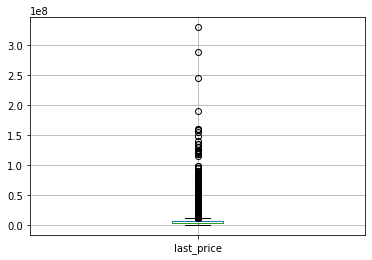

In [127]:
data.boxplot(column='last_price');

In [128]:
#Мы видим выбивающиеся значения выше 150 млн. руб., посмотрим на эти квартиры

In [129]:
data.loc[data['last_price'] > 150000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1022,20,155000000,310.0,2018-10-12,5,5.30,3,190.0,3,True,False,False,63.0,2,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1431,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,True,False,False,40.0,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
2526,16,159984000,242.4,2015-08-27,4,3.85,9,131.0,7,True,False,False,20.0,0,Санкт-Петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,501.0
8856,13,190870000,268.0,2016-03-25,3,3.40,8,132.0,7,True,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,901.0
16371,17,245000000,285.7,2017-04-10,6,3.35,7,182.8,4,True,False,False,29.8,0,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
16405,12,159000000,260.0,2017-04-04,4,3.00,5,180.0,4,True,False,False,30.0,2,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,178.0
19045,20,160000000,243.0,2018-11-12,5,2.65,5,145.0,4,True,False,False,33.0,0,Санкт-Петербург,22640.0,555.0,3.0,285.0,1.0,200.0,18.0
22698,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,True,False,False,30.2,0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN


In [130]:
#Посчитаем долю таких аномальных объявлений

In [131]:
len(data.loc[data['last_price'] > 150000000])/data.shape[0]

0.0003407880724174654

In [132]:
#Апартаменты в Санкт-Петербурге площадью от 187 кв.м до 500 и стоимостью от 200 до 763 млн руб. вполне вероятны, однако
#Удалим из датасета такие квартиры, поскольку это редкие аномальные значения

In [133]:
data = data.loc[data['last_price'] < 150000000]

In [134]:
#Еще раз выведем список характерных значений методом describe()

In [135]:
data['last_price'].describe()

count    2.346700e+04
mean     6.256329e+06
std      6.905965e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.750000e+06
max      1.480000e+08
Name: last_price, dtype: float64

In [136]:
data.shape

(23467, 22)

#### Вывод ####

В результате проведенной предобработки:

 - удалены в общей сумме 0.5% пропусков  в столбцах `floors_total` и  `locality_name`, поскольку на дальнейший анализ такое количество пропущенных значений не оказывает влияния;
 
 
 - скорректированы названия столцов в соответствии с правилом змеиного регистра;
 
 - определено, что пропущенные значения в столбце `is_apartment` отрицает принадлежность продаваемой квартиры к типу "аппартаменты"
 - обработаны пропущенные значения в столбцах `ceiling_height`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`. Пропущенные значения в столбцах `airports_nearest`, `city_сenters_nearest`, `parks_around_3000` и `ponds_around_3000` заполнены медианным значением с группировкой по населенному пункту. Пропуски в столбцах `parks_nearest` и `ponds_nearest`могут означать отсутствие парков и прудов вблизи, поэтому  эти столбцы оставлены как есть. Пропуски в столбце `days_exposition` могут означать, что данные объекты недвижимости еще не проданы, поэтому пропуски в этом столбце также оставлены как есть;
 
 
 - определено, что пропущенные значения в столбцах `city_сenters_nearest`, `parks_around_3000`, `ponds_around_3000`, `parks_nearest` и `pond_nearest` на 98.9% относятся к пригородным населенным пунктам;

 - определено, что пропущенные значения в столбце `is_apartment` отрицает принадлежность продаваемой квартиры к типу "аппартаменты"
 
 - в столбце `rooms` были обнаружены и исправлены значения с нулевым количеством комнат, поскольку подтвердилась гипотеза принадлежности данных объявлений к типу "аппартаменты" и "студия"; также удалены аномальные объявления с количеством комнат более 8.
 
- в столбце `ceiling_height` были обнаружены и исправлены аномальные значения высоты потолков выше от 20 до 100 метров, удалены значения менее 2 метров, так как процент пропусков составлял 0.05%;

- в столбце `locality_name` обработаны неявные дубликаты; 


- в столбцах `last_price`, `first_day_exposition`, `floors_total`, `is_apartment` были преобразованы типы данных.

- удалены и обработаны аномальные и выбивающиеся значения в столбцах `last_price` и `total_area`.



## Расчет и добавление в таблицу новых столбцов ##

In [139]:
#Добавим в таблицу новый столбец 'price_square_meter' - цена за один квадратный метр и округлим полученные значения

In [140]:
data['price_square_meter'] = data['last_price']/data['total_area']

In [141]:
data['price_square_meter'] = np.round(data['price_square_meter'],
                       decimals = 0)

In [142]:
#Проверим произведенные изменения

In [143]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0
3,0,64900000,159.0,2015-07-24,3,3.00,14,45.0,9,True,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0


In [144]:
#Добавим в таблицу новый столбец 'weekday' - день недели публикации объявления и проверим изменения

In [145]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [146]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3
3,0,64900000,159.0,2015-07-24,3,3.00,14,45.0,9,True,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1


In [147]:
#Добавим в таблицу столбец month - месяц публикации объявления и проверим изменения

In [148]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [149]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday,month
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8
3,0,64900000,159.0,2015-07-24,3,3.00,14,45.0,9,True,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6


In [150]:
#Добавим в таблицу столбец year - год публикации объвления и проверим изменения

In [151]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [152]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015
3,0,64900000,159.0,2015-07-24,3,3.00,14,45.0,9,True,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018


In [153]:
#Добавим в таблицу столбец 'floor_type'- тип этажа квартиры (значения — «первый», «последний», «другой»),
#для этого создадим функцию и применим ее к столбцу методом apply

In [154]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    try:    
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        else:
            return 'другой'
    except:
        pass



In [155]:
data['floor_type'] = data.apply(floor_type, axis=1)

In [156]:
#Проверим произведенные изменения

In [157]:
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [158]:
#Добавим в таблицу столбец city_center_km - расстояние до центра города в километрах, переведем метры в километры


In [159]:
data['city_center_km'] = data['city_сenters_nearest']/1000

In [160]:
data['city_center_km'] = data['city_center_km'].round()

In [161]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_type,city_center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,3.00,14,45.0,9,True,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0


**Вывод:** 

Посчитаны и добавлены в таблицу новые столбцы:
 - `price_square_meter`, цена за квадратный метр;
 - `weekday`, день недели публикации объявления;
 - `month`, месяц публикации объявления; 
 - `year`, год публикации объявления;
 - `floor_type`, тип этажа квартиры;
 - `city_center_km`, расстояние до центра города в км.
 

## Проведем исследовательский анализ данных

### Параметры объектов ###


#### Общая площадь ####

In [162]:
#Изучим общую площадь total_area, выведем список характерных значений, построим гистограмму и диаграмму размаха

In [163]:
data['total_area'].describe()

count    23467.000000
mean        59.390333
std         30.607056
min         12.000000
25%         40.000000
50%         52.000000
75%         69.200000
max        342.000000
Name: total_area, dtype: float64

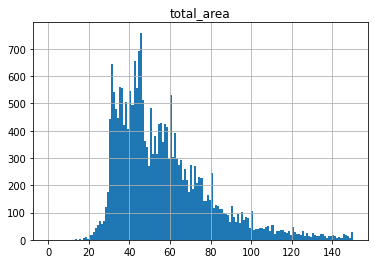

In [164]:
data['total_area'].hist(bins=150, range=(0, 150));
plt.title('total_area')
plt.show()

(-20.0, 200.0)

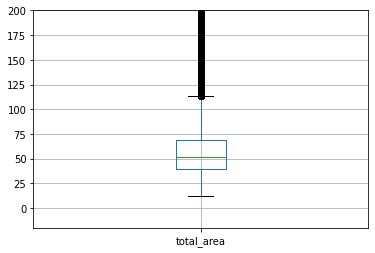

In [165]:
data.boxplot(column = 'total_area')
plt.ylim(-20, 200)

**Вывод:** Большая часть значений лежит в диапазоне от 40 до 70 квадратных метров, что выглядит вполне правдоподобно. Нижний ус диаграммы размаха упирается в 12 кв.м, что подтверждается минимальным значением столбца, но квартир площадью от 12 до 20 квадратных метров сравнительно мало. Верхний ус упирается в 115 кв.м.; диапазон от 12 до 115 квадратных метров - это диапазон нормальных значений, все квартиры площадью более 115 кв.м можно принимать как выбросы. Медианное значение столбца `total_area` 52 кв.м., а среднее значение 60 кв.м. На гистограмме видны пики в области 30 кв.м и 45 кв.м. Сделаем вывод, что самые популярные квартиры в продаже от 40 до 70 кв.м, наибольшее количество объявлений для квартир с общей площадью 45кв.м; на гистограмме видно: чем больше площадь квартиры, тем таких объявлений меньше. Минимальная площадь квартиры 12 кв.м., максимальная площадь квартиры 342 кв.м

#### Жилая площадь ####

In [166]:
#Изучим жилуй площадь living_area, выведем список характерных значений

In [167]:
data['living_area'].describe()

count    23467.000000
mean        33.863905
std         19.543489
min          2.000000
25%         18.400000
50%         30.300000
75%         42.500000
max        255.700000
Name: living_area, dtype: float64

In [168]:
#Минимальное значение 2 кв.м выглядит странно, посмотрим сколько квартир с жилой площадью менее 5 кв.м

In [169]:
data.shape

(23467, 28)

In [170]:
data.query('living_area < 5.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_type,city_center_km
3227,7,4440000,41.0,2017-07-02,1,2.78,17,3.0,17,True,False,False,11.0,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0,108293.0,6,7,2017,последний,13.0
13836,20,6350000,52.0,2018-02-06,2,3.00,6,2.0,2,True,False,False,9.0,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0,122115.0,1,2,2018,другой,7.0
21631,0,2330000,23.0,2018-01-01,1,2.65,24,2.0,22,True,True,False,9.0,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0,101304.0,0,1,2018,другой,NaN
23439,14,64990000,139.0,2015-11-24,3,3.00,8,3.0,8,True,False,False,16.0,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0,467554.0,1,11,2015,последний,6.0


In [171]:
#Квартира с общей площадью 139 с тремя комнатами и жилой площадью всего 3 кв.м еще одна странность, 
#как и двухкомнатная квартира с общей площадью 52 кв.м и жилой 2 кв.м.
#удалим квартиры с аномальным значениями из датасета

In [172]:
data = data.query('living_area > 5.0')

In [173]:
#еще раз выводим обновленные данные для характерных значений

In [174]:
data['living_area'].describe()

count    23462.000000
mean        33.870483
std         19.540370
min          5.400000
25%         18.400000
50%         30.300000
75%         42.500000
max        255.700000
Name: living_area, dtype: float64

In [175]:
#Построим гистограмму и диаграмму размаха для столбца living_area

(-30.0, 150.0)

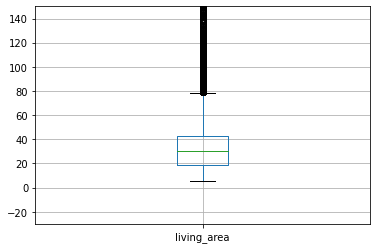

In [176]:
data.boxplot(column='living_area');
plt.ylim(-30, 150)

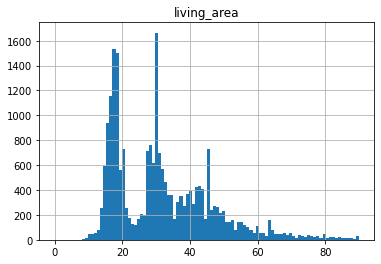

In [177]:
data['living_area'].hist(bins=100, range = (0, 90));
plt.title('living_area')
plt.show()

In [178]:
data['living_area'].value_counts()

18.00    892
17.60    740
30.50    696
17.00    673
30.00    598
        ... 
86.10      1
99.70      1
29.74      1
15.13      1
16.74      1
Name: living_area, Length: 1729, dtype: int64

**Вывод:** Большая часть значений жилой площади лежит в диапазоне от 18 до 42 кв.м. На гистограмме видны пики в области 18 кв.м и 30 кв.м: объявлений с такой жилой площадью больше всего. Нижняя граница уса диаграммы размаха упирается в 5 кв.м, а верхний ус упирается в 80 кв.м Размах усов от 5 до 80 кв.м - это диапазон нормальных значений. Квартиры с жилой площадью более 80 кв.м лежат за пределами нормальных значений и являются выбросами. Среднее и медианное значение, соответственно 30 и 33.87 кв.м стремятся друг к другу, что говорит о том, что в таблице незначительное количество выбросов. Максимальное значение жилой площади 255.7 кв.м.

#### Площадь кухни ####

In [179]:
#Изучим площадь кухонь kitchen_area среди размещенных объявлений kitchen_area, выведем список характерных значений, 
#построим гистограмму и диаграмму размаха

In [180]:
data['kitchen_area'].describe()

count    23462.000000
mean        10.380747
std          5.437105
min          1.300000
25%          7.300000
50%          9.000000
75%         11.497500
max        107.000000
Name: kitchen_area, dtype: float64

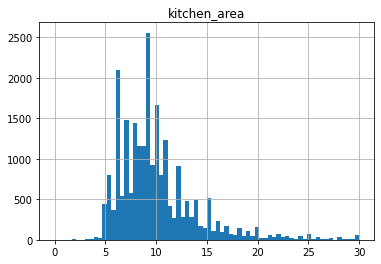

In [181]:
data['kitchen_area'].hist(bins=70, range=(0, 30));
plt.title('kitchen_area')
plt.show()

(-5.0, 30.0)

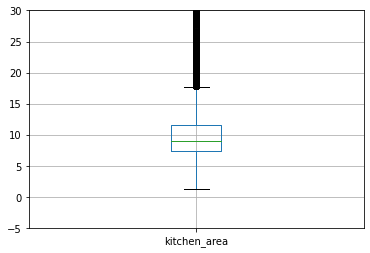

In [182]:
data.boxplot(column='kitchen_area');
plt.ylim(-5, 30)

In [183]:
data['kitchen_area'].value_counts()

9.00     2095
6.00     1295
10.00    1257
8.00     1107
7.00     1062
         ... 
7.12        1
13.73       1
14.74       1
53.10       1
16.74       1
Name: kitchen_area, Length: 955, dtype: int64

**Вывод:** Большая часть значений для столбца `kitchen_area` расположились в диапазоне от 7.3 до 11.5 кв.м. Наиболее часто встречающиеся объявления с площадью кухни 9 кв.м что подтверждается пиком на гистограмме; наиболее часто встречающееся значение, в данном случае, является медианой. Средняя площадь кухни для объявлений составляет 10.3 кв.м. Кухни с площадью более 18 кв.м лежат за пределами нормальных значений. Нормальные значения лежат в диапазоне размаха усов от 1.5 до 18 кв.м. По гистограмме можно назвать распределение нормальным.

#### Цена объекта ####

In [184]:
#Изучим стоимость объектов жилой недвижимости last_price среди размещенных объявлений, выведем список характерных значений, 
#построим гистограмму и диаграмму размаха

In [185]:
#построим гистограмму и диаграмму размаха

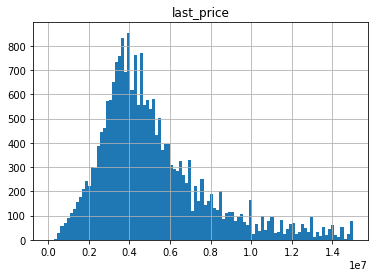

In [186]:
data['last_price'].hist(bins=100, range=(0, 15000000));
plt.title('last_price')
plt.show()


(0.0, 20000000.0)

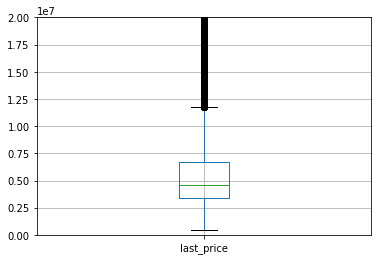

In [187]:
data.boxplot(column='last_price');
plt.ylim(0,20000000)

In [188]:
data['last_price'].describe()

count    2.346200e+04
mean     6.254219e+06
std      6.895950e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.750000e+06
max      1.480000e+08
Name: last_price, dtype: float64

**Вывод:** на гистограмме мы видим типичное нормальное распределение значений цены. Большая часть объявлений о продаже квартир лежит в диапазоне от 3 400 000 руб до 6 750 000 руб. Минимальная цена квартиры 430 000 руб, максимальная цена квартиры 148 870 000 руб.Медианная стоимость квартиры 4 600 000 млн руб, однако средняя стоимость значительно выше: 6 254 000 руб, что говорит о том, что в выборке присутствуют выбросы в более высоких значениях цены. Квартиры стоимостью выше 12 000 000 руб находятся за пределами нормальных значений и являются выбросами. Размах нормальных значений цены лежит в диапазоне от 430 000 руб до 12 000 000 руб.

#### Количество комнат ####

In [189]:
#Изучим распределение комнат rooms среди размещенных объявлений, выведем список характерных значений, 
#построим гистограмму и диаграмму размаха

In [190]:
data['rooms'].describe()

count    23462.000000
mean         2.063081
std          1.012025
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

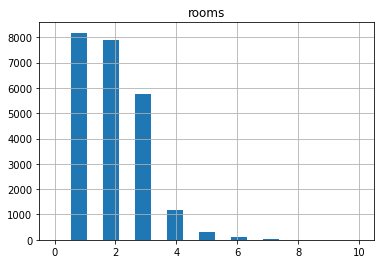

In [191]:
data['rooms'].hist(bins=19, range = (0, 10));
plt.title('rooms')
plt.show()

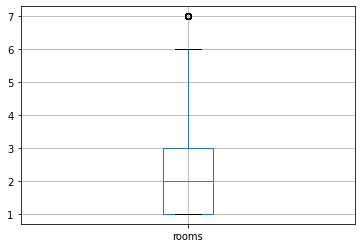

In [192]:
data.boxplot(column='rooms');

**Вывод:** Большая часть объявлений - о продаже однокомнатных, двухкомнатных и трехкомнатных квартир - это границы межквартильного размаха. Лидеры продаж - это однушки и двушки, таких объявлений больше всего. Границы первого уса равны первому квартилю, размах нормальных значений комнат лежит от однокомнатных квартир до шестикомнатных. Встречаются семикомнатные квартиры, и они относятся к выбросам. Медиана и среднее равны друг другу что говорит о том, что в выборке практически отсутствуют выбросы. Минимальное значение - это однокомнатная квартира, максимальное количество комнат в выборке - семь. 

#### Высота потолков ####

In [193]:
#Изучим распределение высоты потолков ceiling_height среди объявлений о продаже квартир, выведем список характерных значений, 
#построим гистограмму и диаграмму размаха

In [194]:
data['ceiling_height'].describe()

count    23462.000000
mean         2.709050
std          0.236757
min          2.200000
25%          2.560000
50%          2.650000
75%          2.750000
max          6.000000
Name: ceiling_height, dtype: float64

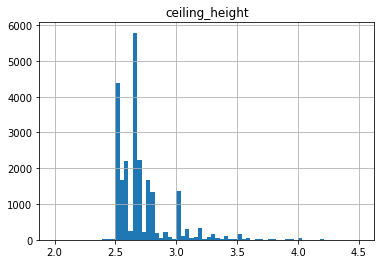

In [195]:
data['ceiling_height'].hist(bins=70, range=(2, 4.5));
plt.title('ceiling_height')
plt.show()

(1.5, 4.0)

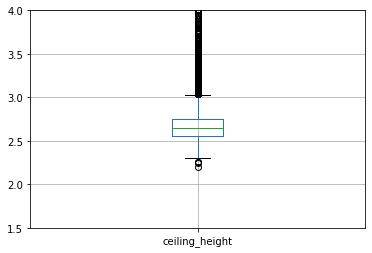

In [196]:
data.boxplot(column='ceiling_height')
plt.ylim(1.5, 4)

In [197]:
data['ceiling_height'].value_counts()

2.65    5598
2.50    4108
2.70    2139
2.60    1994
2.75    1350
        ... 
2.34       1
3.88       1
3.29       1
3.93       1
3.82       1
Name: ceiling_height, Length: 231, dtype: int64

**Вывод:** Большая часть значений лежит в диапазоне от 2.56 до 2.75 метров - это границы межквартильного размаха. Больше всего объявлений о продаже квартир с высотой потолков 2.65, что подтверждается гистограммой. Нормальный диапазон значений потолков от 2.3 до 3 метров, все объявления о продаже квартир с высотой потолков выше 3 метров и менее 2.3 метра можно отнести к выбросам, и таких значений мало, поскольку медиана 2.65 и среднее 2.7 практически равны, о чем говорит стандартное отклонение 0.23 - небольшой характерный разброс значений. Максимальная высота потолков 6 м., минимальная 2.2 м. 

#### Общее количество этажей в доме ####

In [198]:
#Изучим распределение значений относительно этажности домов продаваемых квартир, 
#выведем список характерных значений, построим гистограмму и диаграмму размаха

In [199]:
data['floors_total'].describe()

count    23462.000000
mean        10.682423
std          6.581969
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

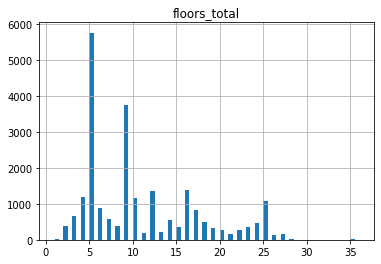

In [200]:
data['floors_total'].hist(bins=70);
plt.title('floors_total')
plt.show()

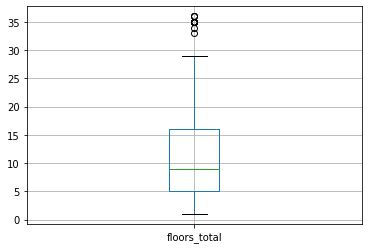

In [201]:
data.boxplot(column='floors_total');

**Вывод:** Больше всего объявлений о продаже квартир в домах от 5 до 16 этажей. Самые распространенные объявления о продаже квартир в пятиэтажных и девяти этажных домах, что подтверждается пиками на гистограмме. Нормальные значения лежат в пределах 1 этажных и 29- этажных домов. Объявлений о продаже квартир в высотках с количеством этаже выше 30 редки и их следует рассматривать как выбросы. В среднем, квартиры продаются в 10-этажных домах, в медианном значении в девятиэтажных. Минимальное значение - одноэтажные дома, максимальная высота дома в продаваемых квартирах 36 этажей.

#### Этаж квартиры ####

In [202]:
#Изучим такой параметр, как этаж продаваемой квартиры, 
#выведем список характерных значений, построим гистограмму и диаграмму размаха

In [203]:
data['floor'].describe()

count    23462.000000
mean         5.877504
std          4.871058
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

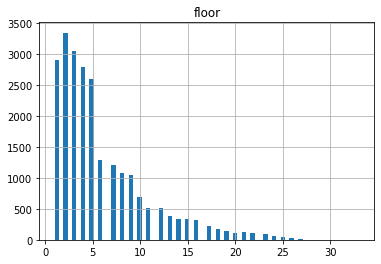

In [204]:
data['floor'].hist(bins=70);
plt.title('floor')
plt.show()

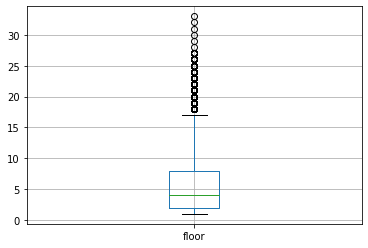

In [205]:
data.boxplot(column='floor');

**Вывод:** Больше всего объявлений о продаже квартир со второго по восьмой этаж - это границы межквартильного размаха. Самые распространенные объявления о продаже квартир на втором и третьем этажах, что подтверждено пиками на гистограмме. Продаваемые квартиры выше 17 этажа достаточно редки, и они относятся к выбросам. В среднем продаются квартиры на 6 этаже, в медианном значении - на четвертом этаже. Диапазон нормальных значений этажей в объявлениях от 1 до 17 этажей. Минимальный этаж продаваемой квартиры - первый, максимальный этаж продаваемой квартиры тридцать третий. Начиная с пятого этажа, чем выше этаж, тем таких объявлений меньше.


#### Тип этажа квартиры ####

In [206]:
#Изучим тип этажа квартиры floor_type, 
#построим гистограмму, круговую диаграмму и методом value_counts() посчитаем количество повторений для уникальных значений 

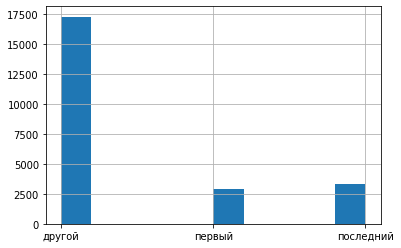

In [207]:
data['floor_type'].hist();

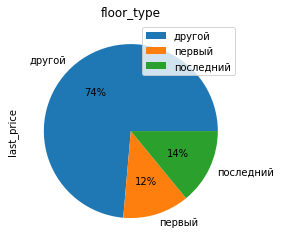

In [208]:
data.groupby(['floor_type']).count().plot(kind='pie', autopct='%1.0f%%', y='last_price');
plt.title('floor_type')

plt.show()

In [209]:
data['floor_type'].value_counts()

другой       17269
последний     3296
первый        2897
Name: floor_type, dtype: int64

**Вывод:** в 74% случаев продаются квартиры между первым и последним этажом, первый и последний этажи менее востребованы. Объвяления о продаже квартир на последнем этаже более популярны (14%), чем на первом этаже (12%).

#### Расстояние до центра города в метрах ####

In [210]:
#Изучим расстояние до центра города city_center_nearest, 
#построим гистограмму, диаграмму размаха, выведем список характерных значений

In [211]:
data['city_сenters_nearest'].describe()

count    18041.000000
mean     14224.319162
std       8603.739596
min        181.000000
25%       9315.000000
50%      13104.000000
75%      16293.000000
max      65968.000000
Name: city_сenters_nearest, dtype: float64

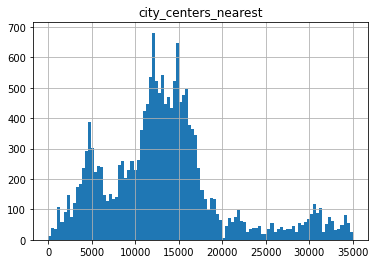

In [212]:
data['city_сenters_nearest'].hist(bins=100, range=(0, 35000));
plt.title('city_сenters_nearest')

plt.show()

(0.0, 35000.0)

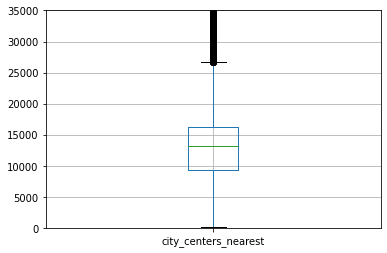

In [213]:
data.boxplot(column='city_сenters_nearest');
plt.ylim(0,35000)

**Вывод:** для тех объявлений, где известно расстояние до центра, больше всего объявлений о продаже квартир в радиусе от 9 до 16 км до центра города. Пики на гистограмме в области 12.5 и 15 километрах показывают наиболее часто встречающиеся квартиры на соответствующем удалении от центра города. В среднем продаются квартиры в 14 километрах от центра города, медианное удаление от центра составляет 13 километров и таких объявлений большое количество. Нижний ус упирается в нулевое значение, что соответствует расположению квартиры в центре города и минимальному значению, равному 180 метрам, таких квартир, судя по гистограмме немного. Квартиры на расстоянии более 27 километров являются выбросами, их значительное количество судя по точкам, сложившимся в черную линию на диаграмме размаха. Максимальная удаленность продаваемой квартиры от центра города равна 66 километрам.

#### Расстояние до ближайшего аэропорта ####

In [214]:
#Изучим распределение объявлений о продаже квартир по расстоянию до ближайшего аэропорта airports_nearest
#Выведем список характерных значений, построим гистограмму и диаграмму размаха.

In [215]:
data['airports_nearest'].describe()

count    17953.000000
mean     28809.664736
std      12647.508339
min          0.000000
25%      18545.000000
50%      26770.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [216]:
#Мы видим минимальное значение 0 км до аэропорта, скорее всего это опечатка, 
#поскольку у приаэродромных территорий нельзя строить жилые дома: 
#уровень шума и вредных выбросов превышает допустимые значения, удалим эту строчку из датасета

In [217]:
data = data.loc[(data['airports_nearest'] > 0.0)|(data['airports_nearest'].isna())]

In [218]:
data['airports_nearest'].describe()

count    17952.000000
mean     28811.269552
std      12646.032528
min       6450.000000
25%      18549.500000
50%      26770.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

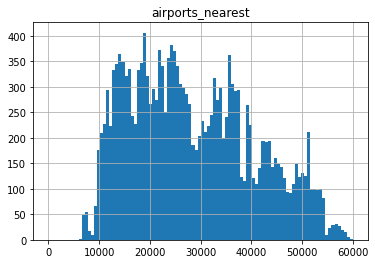

In [219]:
data['airports_nearest'].hist(bins=100, range=(0, 60000));
plt.title('airports_nearest')

plt.show()

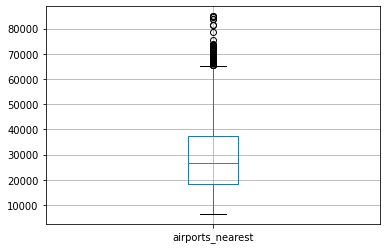

In [220]:
data.boxplot(column='airports_nearest');

**Вывод:** для тех объявлений, где известно расстояние до аэропорта, наибольшее количество объявлений о продаже квартир с удаленностью от аэропорта в радиусе 18.5 до 37 километров. На гистограмме мы видим пик, характеризующий самое распространенное расстояние 19 километров от аэропорта. В среднем встречаются объявления о продаже квартир с удаленностью 28.8 километров от аэропорта, медианное расстояние до аэропорта 26.8 км. Нормальные значения расположились в диапазоне от 6.5 до 65 км до аэропорта, все объявления свыше 65 км до аэропорта следует считать выбросами. Нижний ус упирается в 6.5 - что соответствует минимальному значению 6.5 км до аэропорта. 

####  Расстояние до ближайшего парка ####

In [221]:
#Изучим распределение объявлений о продаже квартир по расстоянию до ближайшего парка parks_nearest
#Выведем список характерных значений, построим гистограмму и диаграмму размаха.

In [222]:
data['parks_nearest'].describe()

count    7965.000000
mean      490.825738
std       341.991982
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

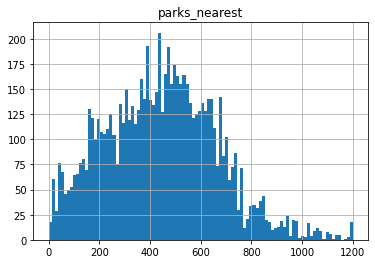

In [223]:
data['parks_nearest'].hist(bins=100, range=(0,1200));
plt.title('parks_nearest')

plt.show()

(-20.0, 1500.0)

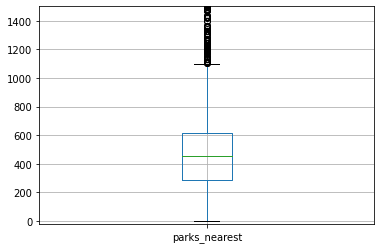

In [224]:
data.boxplot(column='parks_nearest');
plt.ylim(-20, 1500)

In [225]:
data['parks_nearest'].value_counts()

441.0     67
392.0     41
173.0     40
456.0     40
2102.0    30
          ..
647.0      1
779.0      1
726.0      1
2905.0     1
929.0      1
Name: parks_nearest, Length: 990, dtype: int64

**Вывод:** Гистограмма значений расстояния до парка имеет типичное нормальное распределение. Нижний ус упирается практически в 0, что соответсвует минимальному расстоянию до парка 1 метр: в выборке присутствуют квартиры, расположеные в парковой зоне.  Для тех объялений, где известно расстояние до парка, большая часть значений лежит в диапазоне 290-600 метров. Самые распространенные объявления с расстоянием 440 метров до парка. В среднем, квартиры расположены в 490 метрах до парка, медианное расстояние до парка соответствует 455 метрам. Медиана и среднее почти одинаковы, что говорит о том, что в датасете немного выбросов. Квартиры с расположением до парка в радиусе 1 километра относятся к нормальным значениям, все, что дальше отнесем к выбросам. Наиболее удаленная от парка квартира находится на расстоянии 3190 метров до него. 

####  День недели и месяц публикации объявления ####

In [226]:
#Изучим распределение объявлений о продаже квартир в зависимости от дня недели и месяца публикации

In [227]:
#Выведем список характерных значений, гистограмму для столбца weekday

In [228]:
data['weekday'].describe()

count    23461.000000
mean         2.567154
std          1.787942
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

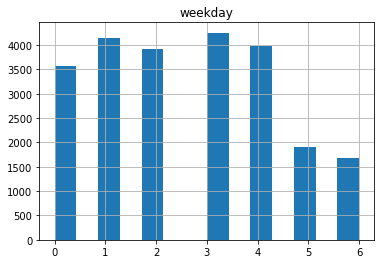

In [229]:
data['weekday'].hist(bins=14);
plt.title('weekday')

plt.show()

Наиболее активные дни публикации объявлений о продаже квартир с понедельника по пятницу, из них чаще всего пользователи публикуют объявления во вторник и четверг. В выходные активность публикаций снижена.

In [230]:
#Выведем список характерных значений, гистограмму для столбца month

In [231]:
data['month'].describe()

count    23461.000000
mean         6.403009
std          3.493109
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

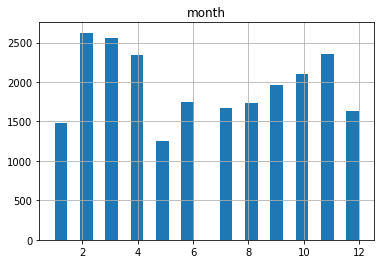

In [232]:
data['month'].hist(bins=24);

plt.title('month')

plt.show()

**Вывод:** Больше всего новых объявлений публикуют вначале года в феврале и марте, в январе и мае публикуют объявлений меньше всего, что, вероятно, связано с новогодними каникулами и майскими праздниками. Летом люди уезажют в отпуска, поэтому объявления о продаже квартир тоже идут на спад. Начиная с сентября и до декабря наблюдается рост новых объявлений о продаже жилой недвижимости

### Исследование столбца days_exposition ###

In [233]:
#Изучим, как быстро продавались квартиры (столбец days_exposition). 
#Этот параметр показывает, сколько дней было размещено каждое объявление.
#Построим гистограмму

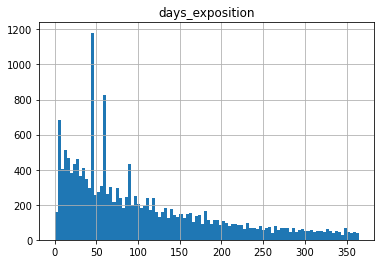

In [234]:
data['days_exposition'].hist(bins=100, range=(0, 365));
plt.title('days_exposition')
plt.show()

(0.0, 700.0)

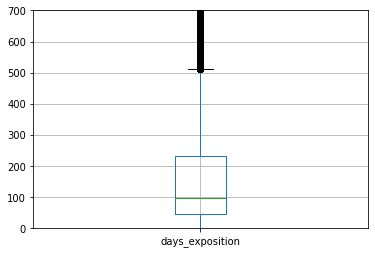

In [235]:
data.boxplot(column='days_exposition');
plt.ylim(0, 700)

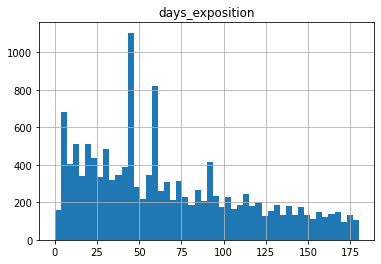

In [236]:
data['days_exposition'].hist(bins=50, range=(0, 180));
plt.title('days_exposition')
plt.show()

In [237]:
data['days_exposition'].value_counts()

45.0      877
60.0      537
7.0       233
30.0      208
90.0      198
         ... 
818.0       1
1.0         1
969.0       1
1147.0      1
1174.0      1
Name: days_exposition, Length: 1136, dtype: int64

**Вывод:** На гистограмме мы можем наблюдать аномальные пики в области 45 дней, 60 дней, 7 дней 30 дней и 90 дней. Самое распространенное время снятия с публикации объявления, судя по гистограмме - через 45 дней; несколько менее распространенное время снятия с публикации, но также достаточно частое - через 60 дней. Есть вероятность, что причина появления пиков - окончание срока размещения объявления, в результате чего происходит автоматическое снятие с публикации. 

В среднем, квартира продается за полгода (среднее время публикации объявления 180 дней), однако медиана в два раза меньше среднего и составляет 95 дней, очевидно в данных много выбросов (слишком длительных продаж).

Большая часть квартир продается в пределах межквартильного размаха: от 45 до 230 дней. 

Самое быстрое время снятия с публикации составляет 1 дней, максимально долгая продажа длилась 1580 дней: больше четырех лет. 

 - Объявления, которые висят дольше 500 дней - можно отнести к необычно долгим продажам. 
 - Объявления, которые снимаются в течение 45 дней - можно отнести к быстрым продажам.
 - Объявления, которые снялись с публикации в течение 7 дней (подтверждающий пик на гистограмме) - можно отнести к необычно быстрым продажам.

Чем быстрее продается квартира, тем таких объявлений больше.

### Влияние факторов на общую (полную) стоимость объекта ###

#### Влияние общей площади на стоимость объекта ####

In [238]:
#Построим график влияния общей площади на стоимость объекта

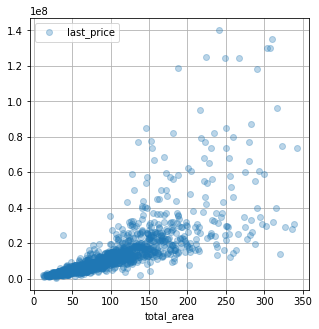

In [239]:
data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(grid=True, style='o', figsize=(5, 5), alpha=0.3);
   

In [240]:
data['total_area'].corr(data['last_price'])

0.7337370208910496

**Вывод:** Коэффициент корелляции Пирсона 0.73 говорит о высокой взаимосвязи между площадью и ценой квартиры. До 50 кв.м цена квартиры зависит от общей площади незначительно, свыше 60 кв.м наблюдается  рост цены с увеличением площади. Начиная от 60 кв.м можно утверждать, что чем больше площадь квартиры, тем дороже она стоит.

#### Влияние жилой площади на стоимость объекта ####

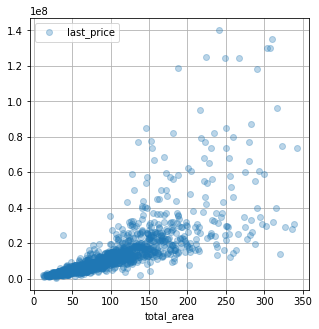

In [241]:
data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(grid=True, style='o', figsize=(5, 5), alpha=0.3);

In [242]:
data['living_area'].corr(data['last_price'])

0.6251091673585352

**Вывод:** коэффициент корреляции 0.63 говорит о наличии средней связи между жилой площадью и ценой на квартиру. При увеличении жилой площади увеличивается стоимость жилья, но так бывает не всегда. До 50 кв.м жилая площадь не влияет на стоимость жилья, начиная с 50 кв.м с увеличением жилой площади растет стоимость квартир.

#### Влияние площади кухни на стоимость объекта ####

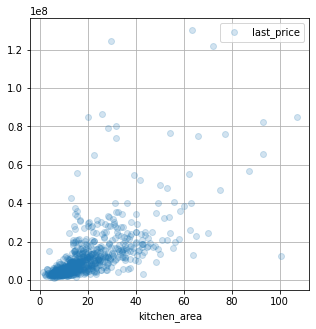

In [243]:
data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').plot(grid=True, style='o', figsize=(5, 5), alpha=0.2);

In [244]:
data['kitchen_area'].corr(data['last_price'])

0.5406165644723091

**Вывод:** Коэффициент корреляции 0.54 говорит о средней взаимосвязи стоимости жилья от площади кухни. На графике: медианные цены на квартиры с площадью кухни свыше 20 кв.м немного выше, чем медианные цены на квартиры площадью до 20 кв.м.

#### Влияние количества комнат на стоимость объекта ####

In [245]:
##Построим столбчатый график влияния количества комнат на стоимость объекта

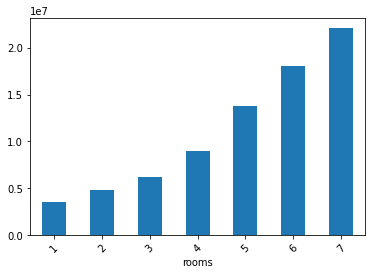

In [246]:
data.groupby('rooms')['last_price'].median().plot(kind='bar', rot=45);

In [247]:
#рассчитаем коэффициент корреляции Пирсона

In [248]:
data['rooms'].corr(data['last_price'])

0.43502489710625986

**Вывод:** Коэффициент корреляции Пирсона 0.43 показывает слабую линейную зависимость между количеством комнат и общей стоимостью объекта. Медианная цена на однокомнатные, двухкомнатные и трехкомнатные квартиры отличается незначительно, свыше четырех комнат медианная цена растет. 

#### Влияние этажа на стоимость объекта ####

In [249]:
##Построим на графики влияния этажа (первый, последний, другой) на стоимость объекта

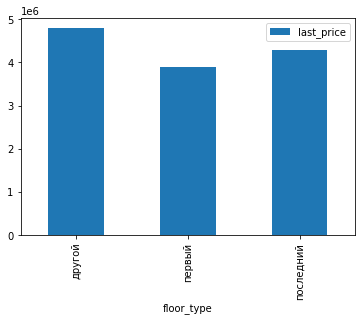

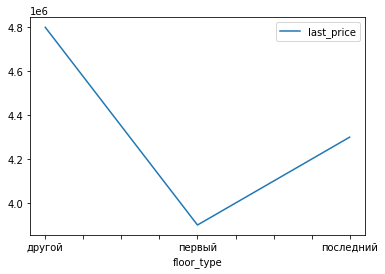

In [250]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(kind='bar');
plt.show()
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot()
plt.show()

**Вывод:** Этаж незначительно влияет на стоимость объекта недвижимости: квартиры на первом этаже в медианной цене дешевле, чем на последнем этаже, а квартиры на последнем этаже дешевле, чем на остальных этажах, кроме первого. То есть, квартиры на других этажах, кроме первого и последнего, дороже. Очевидно, первый и последний этажи не популярные, и продавцы квартир на первом и последних этажа немного снижают стоимость.

#### Влияние даты размещения на стоимость объекта ####

In [251]:
#Построим на графики влияния дня недели на стоимость объекта

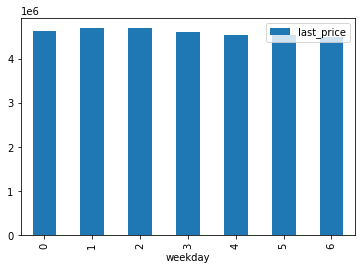

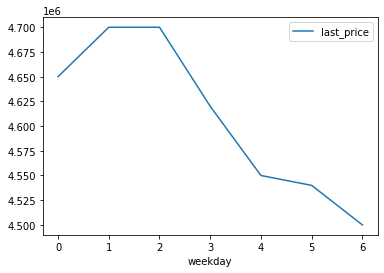

In [252]:
data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(kind='bar');
plt.show()
data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot()
plt.show()

**Вывод:** Медианные цены на квартиры, размещенные с пятницу по воскресенье ниже, чем в объявлениях, размещенных с понедельника по четверг. 

In [253]:
#Построим на графики влияния месяца публикации объявления на стоимость объекта

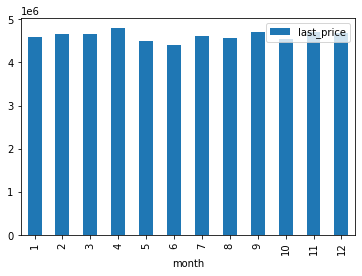

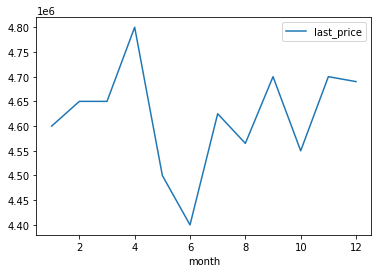

In [254]:
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(kind='bar');
plt.show()
data.pivot_table(index='month', values='last_price', aggfunc='median').plot()
plt.show()


**Вывод:** Наиболее низкие по цене квартиры в объявлениях, размещенных в июне, августе и октябре 4400000 - 4560000 руб., наиболее высокие цены на жилье в апреле 48000000 руб. В остальные месяцы цена на жилье колеблется в диапазоне от 4600000. руб до 47000000 руб.

In [255]:
#Построим на графики влияния года публикации объявления на стоимость объекта

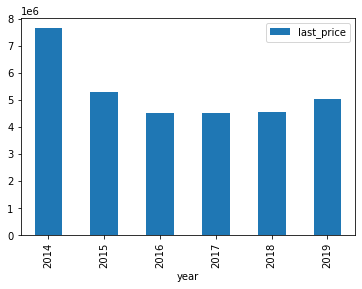

In [256]:
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(kind='bar');

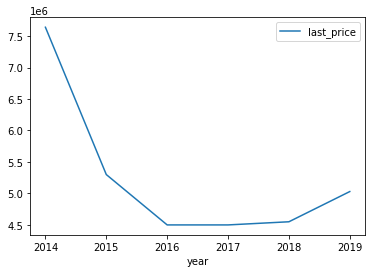

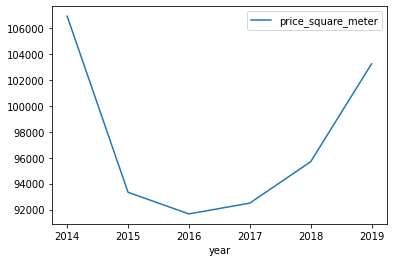

In [257]:
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(label='year_last_price');
data.pivot_table(index='year', values='price_square_meter', aggfunc='median').plot(label='year_price_square_meter');

**Вывод:** С 2014 по 2016 мы можем наблюдать снижение общей стоимости продаваемой недвижимости, а с 2018 наблюдался незначительный рост общей стоимости жилья, при этом начиная с 2016 года цена за квадратный метр росла. Отсюда можно выдвинуть гипотезу, что с 2016 по 2018 года отсутствие роста общей стоимости жилья при росте цены за квадратный метр можно объяснить, что преобладали продажи жилья в пригородах или на окраинах, поскольку жилье в черте города могло быть достаточно дорогим. Также можно выдвинуть гипотезу об активизации ипотечных программ, где покупатели стремились приобрести жилье в "рамках накопленного бюджета".

### Определение средней цены за кв.м в 10 населённых пунктах с наибольшим числом объявлений ###

In [258]:
#Определим среднюю и медианную цену за кв.м в десяти населенных пунктах с наибольшим числом объявлений.

In [259]:
top_ads = data.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['count', 'mean', 'median'])
top_ads.columns = ['count_ads', 'mean_price_square_meter', 'median_price_square_meter']
top_ads = top_ads.sort_values(by='count_ads', ascending=False).head(10)
top_ads['count_ads_percent'] = top_ads['count_ads']/data.shape[0]
top_ads

,count_ads,mean_price_square_meter,median_price_square_meter,count_ads_percent
locality_name,,,,
Санкт-Петербург,15564,114030.780905,104750.0,0.663399
Мурино,585,86015.023932,86232.0,0.024935
Кудрово,469,95261.989339,95588.0,0.019991
Шушары,439,78551.359909,76829.0,0.018712
Всеволожск,397,68719.322418,65789.0,0.016922
Пушкин,367,103130.852861,100000.0,0.015643
Колпино,337,75333.287834,74722.0,0.014364
Парголово,327,90175.886850,91643.0,0.013938
Гатчина,307,68746.110749,67797.0,0.013086


В Санкт-Петербурге 15634 объявлений - наибольшее количество объявлений среди всех населенных пунктов, 66.4% от всех объявлений выборки. В десятку самых популярных населенных пунктов по количеству проданного жилья попали: Мурино, Кудрово, Шушары, Всеволжск, Пушкин, Колпино, Парголово, Гатчина и Выборг. 

In [260]:
#Определим лидеров с самой большой средней ценой за квадратный метр по населенным пунктам
#Методом sort_values() отсортируем столбец в порядке убывания
#Построим столбчатый график зависимости цены 

In [261]:
top_mean_price = top_ads['mean_price_square_meter'].sort_values(ascending=False)
top_mean_price

locality_name
Санкт-Петербург    114030.780905
Пушкин             103130.852861
Кудрово             95261.989339
Парголово           90175.886850
Мурино              86015.023932
Шушары              78551.359909
Колпино             75333.287834
Гатчина             68746.110749
Всеволожск          68719.322418
Выборг              58238.153191
Name: mean_price_square_meter, dtype: float64

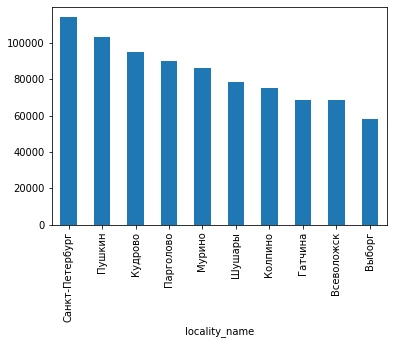

In [262]:
top_mean_price.plot(kind='bar');

Санкт-Петербург - лидер по количеству объявлений о продаже квартир, а также по стоимости жилья за кв.м - средняя цена 114030 руб. за кв.м. Второй по величине стоимости жилья за квадратный метр - это город Пушкин - средняя цена за квадратный метр составила 103130 ру. за кв.м. Третий по величине стоимости жилья за квадратный метр - пригород Санкт-Петербурга - Кудрово, где средняя стоимость жилья за кв.м. составила 95261 руб за кв.м. Завершает ТОП-10 город Выборг со средней стоимостью на жилье 58238 руб. за кв.м.

Выборг - населенный пункт с самой низкой ценой за кв.м: 58238 руб. за кв.м.

In [263]:
top_median_price = top_ads['median_price_square_meter'].sort_values(ascending=False)
top_median_price

locality_name
Санкт-Петербург    104750.0
Пушкин             100000.0
Кудрово             95588.0
Парголово           91643.0
Мурино              86232.0
Шушары              76829.0
Колпино             74722.0
Гатчина             67797.0
Всеволожск          65789.0
Выборг              58308.0
Name: median_price_square_meter, dtype: float64

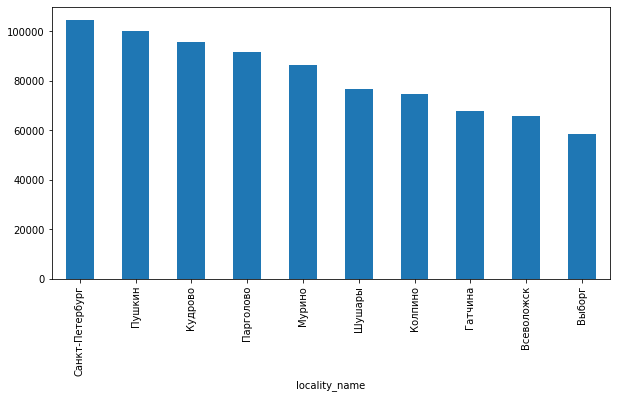

In [264]:
top_median_price.plot(kind='bar', figsize=(10,5));

Порядок распределения населенных пунктов по медианной цене за квадратный метр среди населенных пунктов с наибольшим числом объявлений аналогичен распределению населенных пунктов по средней цене за квадрадный метр. Самая высокая медианная цена за квадратный метр в Санкт-Петербурге, за ним следует Пушкин, Кудрово, Парголово, Мурино, Шушары, Колпино. В Гатчине, Всеволожске и Выборге самая низкая медианная цена за квадратный метр.

In [265]:
#Посмотрим, какой населенный пункт лидер по среднему чеку среди населенных пунктов с наибольшим числом объявлений.
#Найдем средний чек для населенных пунктов 

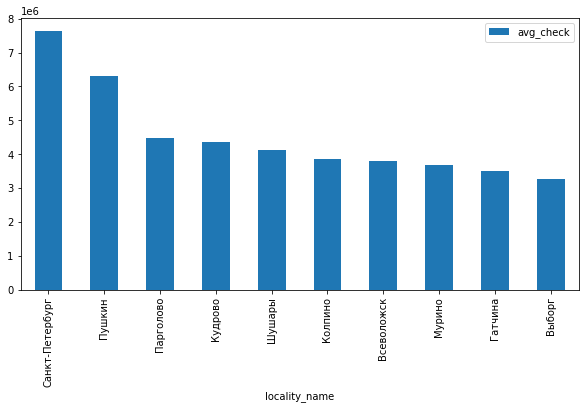

In [266]:
avg_check = data.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'sum'])
avg_check.columns = ['count_ads', 'sum']
avg_check['avg_check'] = avg_check['sum']/avg_check['count_ads']
avg_check = avg_check.sort_values(by='count_ads', ascending=False).head(10)
avg_check.sort_values(by='avg_check', ascending=False).plot(
    y='avg_check', kind='bar', figsize=(10,5)
);

In [267]:
avg_check.sort_values(by='avg_check', ascending=False)

,count_ads,sum,avg_check
locality_name,,,
Санкт-Петербург,15564,118986241485,7.644965e+06
Пушкин,367,2310074264,6.294480e+06
Парголово,327,1467600459,4.488075e+06
Кудрово,469,2043200760,4.356505e+06
Шушары,439,1804205999,4.109809e+06
Колпино,337,1302939246,3.866289e+06
Всеволожск,397,1505748965,3.792819e+06
Мурино,585,2154642700,3.683150e+06
Гатчина,307,1070919360,3.488337e+06


Рейтинг распределения населенных пунктов по среднему чеку отличается от распределения городов по цене за квадратный метр. 
Санкт-Петербург и Пушкино по-прежнему остаются в лидерах по самому высокому чеку, а Выборг остается на последнем месте. Несмотря на то, что в Кудрово цена за квадратный метр выше, чем в Парголово, средний чек в Парголово выше, чем в Кудрово. При этом в Мурино средний чек намного ниже, чем цена за квадратный метр в Мурино по сравнению с другими населенными пунктами.


In [268]:
#Для наглядности отразим диаграмму размаха для ТОП-10 населенных пунктов

(0.0, 200000.0)

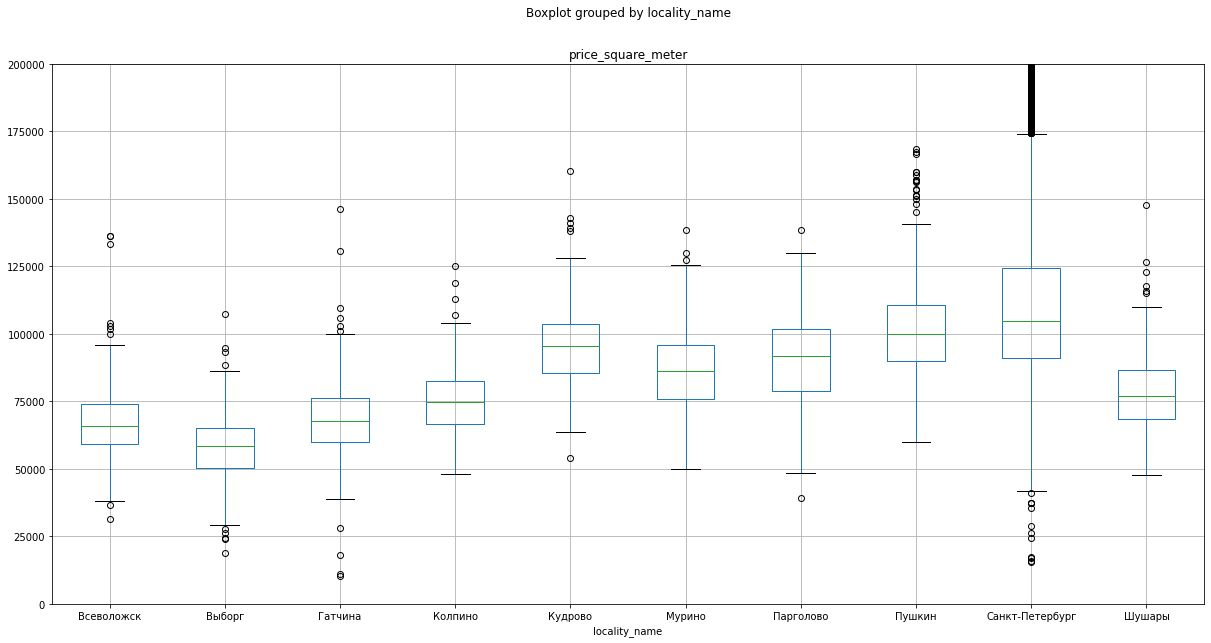

In [269]:
ax = (data
      .query('locality_name in @top_ads.index')
      .boxplot(column='price_square_meter', by='locality_name', figsize=(20,10))
     
)
ax.set_ylim(0, 200000)

**Вывод:** 
Санкт-Петербург является безусловным лидером но наибольшему количеству объявлений о продаже квартир (66.4% от всех объявлений выборки), по наибольшей медианной цене за квадратный метр (104750 руб. за кв.м.), по наибольшей средней цене за кв.м (114030 руб. за кв.м.), а также по среднему чеку (7 644 900 руб. )

Наиболее низкая цена за кв.м в Выборге: средняя цена за кв.м 58238 руб., а медианная цена почти равна 58308 руб., при этом средний чек составил 3 260 779 руб.
Как мы видим, разница в ценах на жилье между Питером и Выборгом более чем в два раза. 


Рейтинг распределения населенных пунктов по среднему чеку отличается от распределения городов по цене за квадратный метр. 
Санкт-Петербург и Пушкино по-прежнему остаются в лидерах по самому высокому чеку, а Выборг остается на последнем месте. Несмотря на то, что в Кудрово цена за квадратный метр выше, чем в Парголово, средний чек в Парголово выше, чем в Кудрово. При этом в Мурино средний чек намного ниже, чем цена за квадратный метр в Мурино по сравнению с другими населенными пунктами.

### Определение средней цены каждого километра в Санкт-Петербурге ###

In [270]:
#Внесем все объявления Санкт-Петербурга в переменную spb_ads

In [271]:
spb_ads = data.loc[data['locality_name'] == 'Санкт-Петербург'].reset_index(drop=True)

In [272]:
#Определим среднюю цену каждого километра для Санкт-Петербурга и построим график

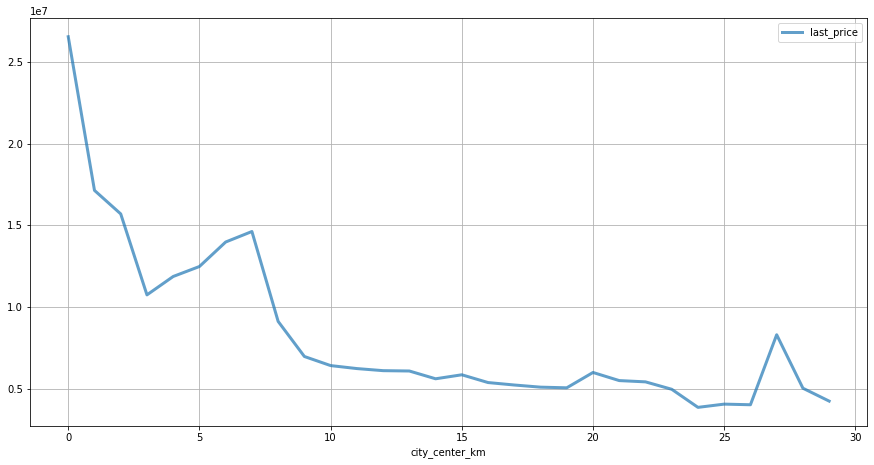

In [273]:
spb_ads.groupby('city_center_km')['last_price'].mean().plot(
    linewidth=3,
    alpha=0.7,
    grid=True,
    legend=True,
    figsize=(15,7.5),
);


In [274]:
spb_ads['city_center_km'].corr(spb_ads['last_price'])

-0.3476008091055768

**Вывод:** График наглядно демонстрирует зависимость цены от удаленности от центра города. Самое дорогие квартиры расположены в центре Санкт-Петербурга стоимостью свыше 26 млн. руб; в радиусе 3 километров квартиры падают до 11 млн. руб. От 3 до 6 километров квартиры немного поднимаются в цене от 11 до 15 млн. руб. В радиусе от 6 до 8 км ценник варьируется от 15 до 7 млн. руб. В радиусе от 10 до 26 км ценник варьируется от 6 до 4 млн. руб. В радиусе 27 км стоимость жилья снова поднимается до 8 млн. руб, вероятно, это может быть связано с продажей жилья около Пушкина (который как раз находится от центра города примерно на таком расстоянии) в районе, который относится к Санкт-Петербургу, либо продавцы квартир Пушкино могли указывать населенный пункт Санкт-Петербург для повышения привлекательности цены на фоне других объявлений в Санкт-Петербурге. В радиусе свыше 28 км от центра города стоимость квартир падает до 4 млн. руб. 

Коэффициент корреляции Пирсона слабый отрицательный -0.34 и означает, что чем дальше квартира от центра города, тем она дешевле, но так бывает не всегда.

In [275]:
data.shape[0] / data_full.shape[0]

0.989957382168024

В результате исследования процент удаленных значений составил 1.1%


##  Общий вывод

<p></p>

<div style="border:solid green 2px; padding: 20px">
    
<b>Цель исследования:</b>

 1. Найти интересные закономерности и зависимости, которые существуют на рынке.
 2. Выяснить, какие факторы больше всего влияют на стоимость квартиры.


     
<b>Входные данные:</b> архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
    
      
    
**Ход исследования:**

 ****1. Обзор данных.****
    
 - В исходной таблице 23699 строк и 22 столбца. В 14 столбцах пропущены значения, из них в двух столбцах менее 0.05% пропусков, в остальных 12 столбцах более 5% пропусков. В целом процент пропусков довольно высокий, что может незначительно исказить результаты исследования. Часть пропусков подлежат корректировке в ходе предобрабоки данных.
    
    
 - В названиях столбцов `cityCenters_nearest`, `parks_around3000`, `ponds_around3000`  нарушено правило змеиного регистра названий столбцов, что подлежит корректировке в ходе предобработки данных.
    
    
 - В столбцах неккоректный или нелогичный тип данных: 
     в столбце `is_apartment ` согласно документации тип данных `bool`, а в общей информации о таблице указан тип данных `object`; в столбце `first_day_exposition`логичный тип данных `datetime`, а в общей информации о таблице указан тип данных  `object`; В столбце `floors_total`мы видим тип данных `float64`, а правильный тип данных `int64`, так как количество этажей - это целое число; тоже самое касается и столбцов: `balcony`, `parks_around3000`, `ponds_around3000`, что подлежит корректировке в ходе предобработки данных
    

 - С помощью общей гистограммы была получена общая информация о распределении, в целом аномалий не обнаружено.
    
 
****2. Предобработка данных.****    
    
В ходе предобрабоки данных:

 - скорректированы названия столцов в соответствии с правилом змеиного регистра;
    
    
 - удалены в общей сумме 0.5% пропусков  в столбцах `floors_total` и  `locality_name`, поскольку на дальнейший анализ такое количество пропущенных значений не оказывает влияния;
    
    
 - обработаны пропущенные значения в столбцах `ceiling_height`,  
`living_area`, `is_apartment`, `kitchen_area`, `balcony`;
    
    определено, что пропущенные значения в столбце `balcony` означает отсутствие балконов.
    
    определено, что пропущенные значения в столбце `is_apartment` отрицает принадлежность продаваемой квартиры к типу "аппартаменты"

    определено, что пропущенные значения в столбцах `city_сenters_nearest`, `parks_around_3000`, `ponds_around_3000`, `parks_nearest`,`pond_nearest`, `airports_nearest` на 98.9% относятся к пригородным населенным пунктам. 
    
    Пропущенные значения в столбцах city_сenters_nearest заполнены медианным значением с группировкой по населенному пункту. 
    
    Пропуски в столбцах `parks_nearest` и `ponds_nearest`могут означать отсутствие парков и прудов вблизи, поэтому  эти пропуски оставлены. 
    Пропуски в столбцах `parks_around_3000`, `ponds_around_3000`, `airports_nearest` также оставлены как есть, поскольку мы не можем узнать на каком расстоянии находится та или иная продаваемая квартира.
    
    Пропуски в столбце `days_exposition` могут означать, что данные объекты недвижимости еще не проданы, поэтому пропуски в этом столбце также оставлены.
    
     в столбце `ceiling_height` были обнаружены и исправлены аномальные значения высоты потолков от 7 до 100 метров, удалены значения менее 2 метров.

     в столбце `rooms` были обнаружены и исправлены значения с нулевым количеством комнат, поскольку подтвердилась гипотеза принадлежности данных объявлений к типу "аппартаменты" или "студия". Удалены аномальные объявления с количеством комнат более 8.
    
     в столбце `locality_name` обработаны неявные дубликаты; 

     в столбцах `last_price`, `first_day_exposition`, 'floors_total', `is_apartment` были преобразованы типы данных. 
     в столбцах `last_price` и `total_area`удалены и обработаны аномальные и выбивающиеся значения.
    
    
****3. Расчет и добавление в таблицу новых столбцов.****
    
    Посчитаны и добавлены в таблицу новые столбцы:
 - `price_square_meter`, цена за квадратный метр;
 - `weekday`, день недели публикации объявления;
 - `month`, месяц публикации объявления; 
 - `year`, год публикации объявления;
 - `floor_type`, тип этажа квартиры;
 - `city_center_km`, расстояние до центра города в км.
    
    
****4. Исследовательский анализ данных.****
    
В ходе проведенного исследовательского анализа данных:
    
 ****4.1. Построены гистограммы, изучены и описаны параметры объектов:****
   *****общая площадь*****;
   *****жилая площадь*****;
*****площадь кухни*****;
*****цена объекта*****;
*****количество комнат*****;
*****высота потолков*****;
*****этаж квартиры*****;
*****тип этажа квартиры***** («первый», «последний», «другой»);
*****общее количество этажей в доме*****;
*****расстояние до центра города в метрах*****;
*****расстояние до ближайшего аэропорта*****;
*****расстояние до ближайшего парка*****;
*****день и месяц публикации объявления*****.

 - Большая часть значений общей площади лежит в диапазоне от 40 до 70 квадратных метров, что выглядит вполне правдоподобно. Нижний ус диаграммы размаха упирается в 12 кв.м, что подтверждается минимальным значением столбца, но квартир с общей площадью от 12 до 20 квадратных метров сравнительно мало. Верхний ус упирается в 115 кв.м.; диапазон от 12 до 115 квадратных метров - это диапазон нормальных значений, все квартиры площадью более 115 кв.м можно принимать как выбросы. Медианное значение столбца `total_area` 52 кв.м., а среднее значение 60 кв.м. На гистограмме видны пики в области 30 кв.м и 45 кв.м. Сделаем вывод, что самые популярные квартиры в продаже от 40 до 70 кв.м, наибольшее количество объявлений для квартир с общей площадью 45кв.м; на гистограмме видно: чем больше площадь квартиры, тем таких объявлений меньше. Минимальная площадь квартиры 12 кв.м., максимальная площадь квартиры 342 кв.м 
  
 - Большая часть значений жилой площади лежит в диапазоне от 18 до 42 кв.м. На гистограмме видны пики в области 18 кв.м и 30 кв.м: объявлений с такой жилой площадью больше всего. Нижняя граница уса диаграммы размаха упирается в 5 кв.м, а верхний ус упирается в 80 кв.м Размах усов от 5 до 80 кв.м - это диапазон нормальных значений. Квартиры с жилой площадью более 80 кв.м лежат за пределами нормальных значений и являются выбросами. Среднее и медианное значение, соответственно 30 и 33.87 кв.м стремятся друг к другу, что говорит о том, что в таблице незначительное количество выбросов. Максимальное значение жилой площади 255.7 кв.м.    
    
 - Большая часть значений для столбца `kitchen_area` расположились в диапазоне от 7.3 до 11.5 кв.м. Наиболее часто встречающиеся объявления с площадью кухни 9 кв.м что подтверждается пиком на гистограмме; наиболее часто встречающееся значение, в данном случае, является медианой. Средняя площадь кухни для объявлений составляет 10.3 кв.м. Кухни с площадью более 18 кв.м лежат за пределами нормальных значений. Нормальные значения лежат в диапазоне размаха усов от 1.5 до 18 кв.м. По гистограмме можно назвать распределение нормальным.    
    
 - На гистограмме отображено типичное нормальное распределение значений цены для квартир выборки. Большая часть объявлений о продаже квартир лежит в диапазоне от 3 400 000 руб до 6 750 000 руб. Минимальная цена квартиры 430 000 руб, максимальная цена квартиры 148 870 000 руб.Медианная стоимость квартиры 4 600 000 млн руб, однако средняя стоимость значительно выше: 6 254 000 руб, что говорит о том, что в выборке присутствуют выбросы в более высоких значениях цены. Квартиры стоимостью выше 12 000 000 руб находятся за пределами нормальных значений и являются выбросами. Размах нормальных значений цены лежит в диапазоне от 430 000 руб до 12 000 000 руб.
    

    
 - Лидеры продаж - это однокомнатные и двухкомнатные квартиры, таких объявлений больше всего. В выборке встречаются семикомнатные квартиры. Медиана и среднее равны друг другу что говорит о том, что в выборке отсутствуют выбросы. Минимальное значение - это однокомнатная квартира, максимальное количество комнат в выборке - семь.     
    
 - Большая часть значений высоты потолков лежат в диапазоне от 2.56 до 2.75 метров - это границы межквартильного размаха. Больше всего объявлений о продаже квартир с высотой потолков 2.65, что подтверждается гистограммой. Нормальный диапазон значений потолков от 2.3 до 3 метров, все объявления о продаже квартир с высотой потолков выше 3 метров и менее 2.3 метра можно отнести к выбросам, и таких значений мало, поскольку медиана 2.65 и среднее 2.7 практически равны, о чем говорит стандартное отклонение 0.23 - небольшой характерный разброс значений. Максимальная высота потолков 6 м., минимальная 2.2 м.
    
    
 - Наибольшее количество объявлений о продаже квартир в домах от 5 до 16 этажей. Самые распространенные объявления о продаже квартир в пятиэтажных и девятиэтажных домах, что подтверждается пиками на гистограмме. Нормальные значения лежат в пределах 1 этажных и 29- этажных домов. Объявлений о продаже квартир в высотках с количеством этаже выше 30 редки и их следует рассматривать как выбросы. В медианном значении квартиры продаются в девятиэтажных домах, в среднем квартиры продаются в десятиэтажных домах. Минимальное значение - одноэтажные дома, максимальная высота дома в продаваемых квартирах 36 этажей.
    
    
 - Больше всего объявлений о продаже квартир, расположенных со второго по восьмой этаж - это границы межквартильного размаха. Самые распространенные объявления о продаже квартир на втором и третьем этажах, что подтверждено пиками на гистограмме. Продаваемые квартиры выше 17 этажа достаточно редки, и они относятся к выбросам. В среднем продаются квартиры на 6 этаже, в медианном значении - на четвертом этаже. Диапазон нормальных значений этажей в объявлениях от 1 до 17 этажей. Минимальный этаж продаваемой квартиры - первый, максимальный этаж продаваемой квартиры тридцать третий. Начиная с пятого этажа, чем выше этаж, тем таких объявлений меньше.
    
 - В 74% случаев продаются квартиры между первым и последним этажом, первый и последний этажи менее востребованы. Объвяления о продаже квартир на последнем этаже более популярны (14%), чем на первом этаже (12%).    

 - Для тех объявлений, где известно расстояние до центра города, больше всего объявлений о продаже квартир в радиусе от 9 до 16 км. Пики на гистограмме в области 12.5 и 15 километрах показывают наиболее часто встречающиеся квартиры на соответствующем удалении от центра города. В среднем продаются квартиры в 14 километрах от центра города, медианное удаление от центра составляет 13 километров и таких объявлений большое количество. Нижний ус упирается в нулевое значение, что соответствует расположению квартиры в центре города и минимальному значению, равному 180 метрам, таких квартир, судя по гистограмме немного. Квартиры на расстоянии более 27 километров являются выбросами, их значительное количество судя по точкам, сложившимся в черную линию на диаграмме размаха. Максимальная удаленность продаваемой квартиры от центра города равна 66 километрам.   
    
 - Для тех объявлений, где известно расстояние до аэропорта, наибольшее количество объявлений о продаже квартир с удаленностью от аэропорта в радиусе 18.5 до 37 километров. На гистограмме мы видим пик, характеризующий самое распространенное расстояние 19 километров от аэропорта. В среднем встречаются объявления о продаже квартир с удаленностью 28.8 километров от аэропорта, медианное расстояние до аэропорта 26.8 км. Нормальные значения расположились в диапазоне от 6.5 до 65 км до аэропорта, все объявления свыше 65 км до аэропорта следует считать выбросами. Нижний ус упирается в 6.5 - что соответствует минимальному значению 6.5 км до аэропорта.      
    
 - Гистограмма значений расстояния до парка имеет типичное нормальное распределение. Нижний ус упирается практически в 0, что соответсвует минимальному расстоянию до парка 1 метр: в выборке присутствуют квартиры, расположеные в парковой зоне.  Для тех объялений, где известно расстояние до парка, большая часть значений лежит в диапазоне 290-600 метров. Самые распространенные объявления с расстоянием 440 метров до парка. В среднем, квартиры расположены в 490 метрах до парка, медианное расстояние до парка соответствует 455 метрам. Медиана и среднее почти одинаковы, что говорит о том, что в датасете немного выбросов. Квартиры с расположением до парка в радиусе 1 километра относятся к нормальным значениям, все, что дальше отнесем к выбросам. Наиболее удаленная от парка квартира находится на расстоянии 3190 метров до него. .     
    
 - Наиболее активные дни публикации объявлений о продаже квартир с понедельника по пятницу, из них чаще всего пользователи публикуют объявления во вторник и четверг. В выходные активность публикаций снижена.
    
 - Больше всего новых объявлений публикуют в начале года в феврале и марте, в январе и мае публикуют объявлений меньше всего, что, вероятно, связано с новогодними каникулами и майскими праздниками. Летом люди уезажют в отпуска, поэтому объявления о продаже квартир тоже идут на спад. Начиная с сентября и до декабря наблюдается рост новых объявлений о продаже жилой недвижимости. 
    
    
    
 - Количество дней публикации объявления: на гистограмме мы можем наблюдать аномальные пики в области 45 дней, 60 дней, 7 дней 30 дней и 90 дней. Самое распространенное время снятия с публикации объявления, судя по гистограмме - через 45 дней; несколько менее распространенное время снятия с публикации, но также достаточно частое - через 60 дней. Есть вероятность, что причина появления пиков - окончание срока размещения объявления, в результате чего происходит автоматическое снятие с публикации. 

 - В среднем, квартира продается за полгода (среднее время публикации объявления 180 дней), однако медиана в два раза меньше среднего и составляет 95 дней, очевидно в данных много выбросов (слишком длительных продаж).

 - Большая часть квартир продается в пределах межквартильного размаха: от 45 до 230 дней. 
    
    
 - Самое быстрое время снятия с публикации составляет 1 дней, максимально долгая продажа длилась 1580 дней: больше четырех лет. 

 - Объявления, которые висят дольше 500 дней - можно отнести к необычно долгим продажам. 
 - Объявления, которые снимаются в течение 45 дней - можно отнести к быстрым продажам.
 - Объявления, которые снялись с публикации в течение 7 дней (подтверждающий пик на гистограмме) - можно отнести к необычно быстрым продажам.

 - Чем быстрее продается квартира, тем таких объявлений больше.    
   
****4.2. Изучено влияние факторов на полную (общую) стоимость квартиры.****
    
 - До 50 кв.м цена квартиры зависит от общей площади незначительно, свыше 60 кв.м наблюдается  рост цены с увеличением площади. Начиная от 60 кв.м можно утверждать, что чем больше площадь квартиры, тем дороже она стоит. Коэффициент корелляции Пирсона 0.73 говорит о высокой взаимосвязи между площадью и ценой квартиры. 
    
    
 - При увеличении жилой площади увеличивается стоимость жилья, но так бывает не всегда. До 50 кв.м жилая площадь не влияет на стоимость жилья, начиная с 50 кв.м с увеличением жилой площади растет стоимость квартир. Коэффициент корреляции 0.63 говорит о наличии средней связи между жилой площадью и ценой на квартиру. 
    
 - Коэффициент корреляции 0.54 говорит о средней взаимосвязи стоимости жилья от площади кухни. На графике: медианные цены на квартиры с площадью кухни свыше 20 кв.м немного выше, чем медианные цены на квартиры площадью до 20 кв.м.  
    
 -  Коэффициент корреляции Пирсона 0.43 показывает слабую линейную зависимость между количеством комнат и общей стоимостью объекта. Медианная цена на однокомнатные, двухкомнатные и трехкомнатные квартиры отличается незначительно, свыше четырех комнат медианная цена растет. 
    
 - Выбор этажа незначительно влияет на стоимость объекта недвижимости: квартиры на первом этаже в медианной цене дешевле, чем на последнем этаже, а квартиры на последнем этаже дешевле, чем на остальных этажах, кроме первого. То есть, квартиры на других этажах, кроме первого и последнего, дороже. Очевидно, первый и последний этажи не популярные, и продавцы квартир на первом и последних этажа немного снижают стоимость.    
    
    
 - Медианные цены на квартиры, размещенные с пятницу по воскресенье ниже, чем в объявлениях, размещенных с понедельника по четверг.     
    
 - Наиболее низкие по цене квартиры в объявлениях, размещенных в июне, августе и октябре 4400000 - 4560000 руб., наиболее высокие цены на жилье в апреле 48000000 руб. В остальные месяцы цена на жилье колеблется в диапазоне от 4600000. руб до 47000000 руб.
    
 - С 2014 по 2016 мы можем наблюдать снижение общей стоимости продаваемой недвижимости, а с 2018 наблюдался незначительный рост общей стоимости жилья, при этом начиная с 2016 года цена за квадратный метр росла. Отсюда можно выдвинуть гипотезу, что с 2016 по 2018 года отсутствие роста общей стоимости жилья при росте цены за квадратный метр можно объяснить, что преобладали продажи жилья в пригородах или на окраинах, поскольку жилье в черте города могло быть достаточно дорогим. Также можно выдвинуть гипотезу об активизации ипотечных программ, где покупатели стремились приобрести жилье в "рамках накопленного бюджета".   

****4.3. Определена средняя цена за кв.м в 10 населённых пунктах с наибольшим числом объявлений.****
   
 - В десятку самых популярных населенных пунктов по количеству проданного жилья попали: Санкт-Петербург, Мурино, Кудрово, Шушары, Всеволжск, Пушкин, Колпино, Парголово, Гатчина и Выборг.    
    
   
    
 - Санкт-Петербург является безусловным лидером но наибольшему количеству объявлений о продаже квартир (66.4% от всех объявлений выборки), по наибольшей медианной цене за квадратный метр (104750 руб. за кв.м.), по наибольшей средней цене за кв.м (114030 руб. за кв.м.), а также по среднему чеку (7 644 900 руб.)

 - Наиболее низкая цена за кв.м в Выборге: средняя цена за кв.м 58238 руб., а медианная цена равна 58308 руб., при этом средний чек составил 3 260 779 руб.
Разница в ценах на жилье между Питером и Выборгом составила более чем в два раза. 

 - Второй по величине стоимости жилья за квадратный метр - это город Пушкин - средняя цена за квадратный метр составила 103130 руб. за кв.м. Третий по величине стоимости жилья за квадратный метр - пригород Санкт-Петербурга - Кудрово, где средняя стоимость жилья за кв.м. составила 95261 руб за кв.м. Завершает ТОП-10 город Выборг со средней стоимостью на жилье 58238 руб. за кв.м. Порядок распределения населенных пунктов по медианной цене за квадратный метр среди населенных пунктов с наибольшим числом объявлений аналогичен распределению населенных пунктов по средней цене за квадрадный метр.   

 - Рейтинг распределения населенных пунктов по среднему чеку отличается от распределения городов по цене за квадратный метр. 
Санкт-Петербург и Пушкино по-прежнему остаются в лидерах по самому высокому чеку, а Выборг остается на последнем месте. Несмотря на то, что в Кудрово цена за квадратный метр выше, чем в Парголово, средний чек в Парголово выше, чем в Кудрово. При этом в Мурино средний чек намного ниже, чем цена за квадратный метр в Мурино по сравнению с другими населенными пунктами.    

****4.4. Определение взаимосвязи цены от удаленности от центра Санкт-Петербурга.****    
    
График наглядно демонстрирует зависимость цены от удаленности от центра города. Самое дорогие квартиры расположены в центре Санкт-Петербурга стоимостью свыше 26 млн. руб; в радиусе 3 километров квартиры падают до 11 млн. руб. От 3 до 6 километров квартиры немного поднимаются в цене от 11 до 15 млн. руб. В радиусе от 6 до 8 км ценник варьируется от 15 до 7 млн. руб. В радиусе от 10 до 26 км ценник варьируется от 6 до 4 млн. руб. В радиусе 27 км стоимость жилья снова поднимается до 8 млн. руб, вероятно, это может быть связано с продажей жилья около Пушкина (который как раз находится от центра города примерно на таком расстоянии) в районе, который относится к Санкт-Петербургу, либо продавцы квартир Пушкино могли указывать населенный пункт Санкт-Петербург для повышения привлекательности цены на фоне других объявлений в Санкт-Петербурге. В радиусе свыше 28 км от центра города стоимость квартир падает до 4 млн. руб.


</div>